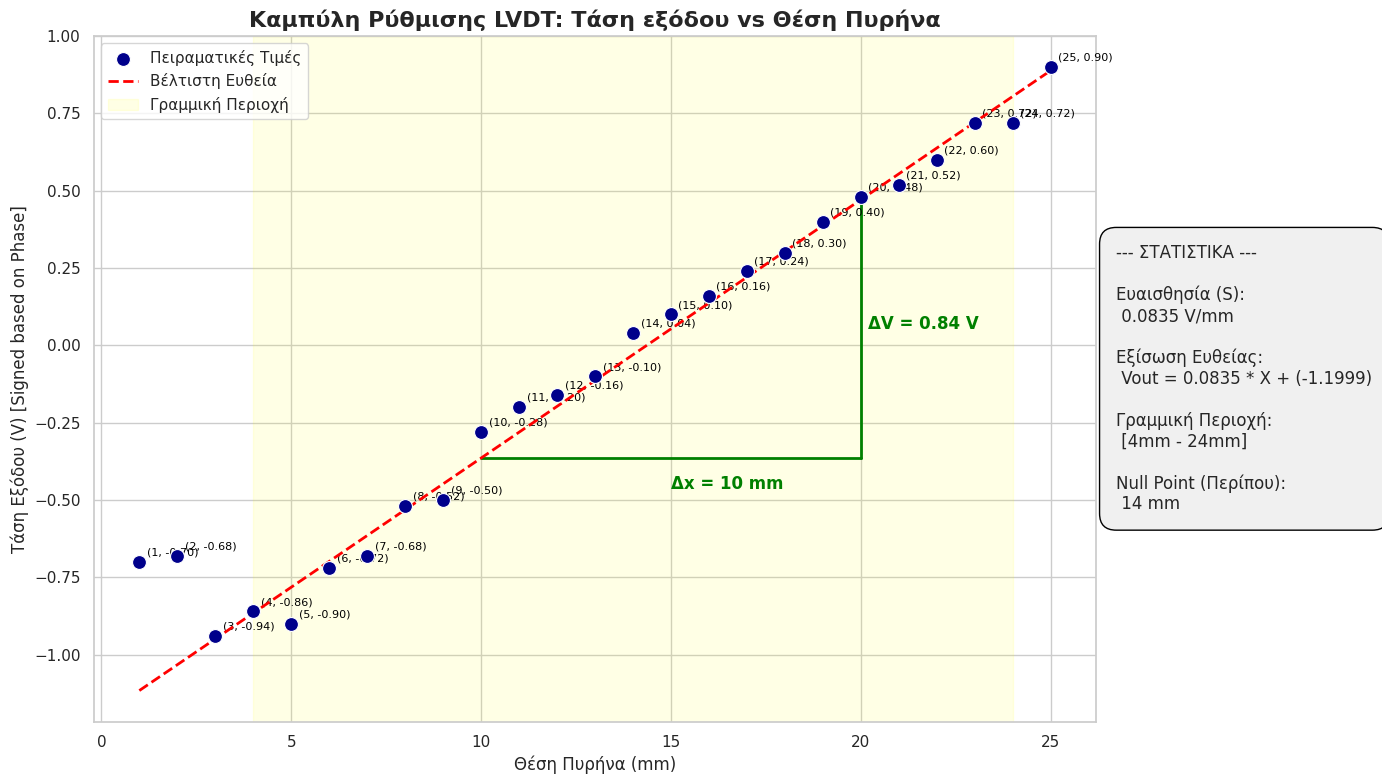

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 1. ΕΙΣΑΓΩΓΗ ΔΕΔΟΜΕΝΩΝ (Από τον Πίνακα 1)
# ==========================================
data = {
    'Position_mm': [25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
                    13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Voltage_Vpp': [0.9, 0.72, 0.72, 0.6, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16, 0.1, 0.04,
                    0.1, 0.16, 0.2, 0.28, 0.5, 0.52, 0.68, 0.72, 0.9, 0.86, 0.94, 0.68, 0.70],
    'Phase_Deg':   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                    180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
}

df = pd.DataFrame(data)

# ==========================================
# 2. ΕΠΕΞΕΡΓΑΣΙΑ (Πρόσημο βάσει Φάσης)
# ==========================================
# Αν η φάση είναι 180, κάνουμε την τάση αρνητική για να φανεί η γραμμικότητα γύρω από το μηδέν
df['Signed_Voltage'] = df.apply(lambda row: -row['Voltage_Vpp'] if row['Phase_Deg'] == 180 else row['Voltage_Vpp'], axis=1)

# Ορισμός Γραμμικής Περιοχής (Επιλέγουμε π.χ. από 4mm έως 22mm για την βέλτιστη ευθεία)
# Μπορείς να αλλάξεις τα όρια αν θες να αποκλείσεις τα άκρα
linear_df = df[(df['Position_mm'] <= 24) & (df['Position_mm'] >= 4)]

# ==========================================
# 3. ΥΠΟΛΟΓΙΣΜΟΣ ΒΕΛΤΙΣΤΗΣ ΕΥΘΕΙΑΣ (Linear Regression)
# ==========================================
x = linear_df['Position_mm']
y = linear_df['Signed_Voltage']
slope, intercept = np.polyfit(x, y, 1) # y = ax + b

# Δημιουργία σημείων για την ευθεία (για όλο το εύρος του γραφήματος)
x_line = np.linspace(df['Position_mm'].min(), df['Position_mm'].max(), 100)
y_line = slope * x_line + intercept

# ==========================================
# 4. ΡΥΘΜΙΣΗ ΓΡΑΦΙΚΗΣ ΠΑΡΑΣΤΑΣΗΣ
# ==========================================
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8)) # Μεγάλο πλάτος για να χωρέσει το Info Box

# --- Plot Points ---
sns.scatterplot(data=df, x='Position_mm', y='Signed_Voltage', s=100, color='darkblue', label='Πειραματικές Τιμές', zorder=5)

# --- Plot Best Fit Line ---
plt.plot(x_line, y_line, color='red', linestyle='--', linewidth=2, label='Βέλτιστη Ευθεία', zorder=4)

# --- Annotate Points (Εμφάνιση τιμών x,y δίπλα σε κάθε σημείο) ---
for i in range(df.shape[0]):
    plt.text(
        x=df.Position_mm[i]+0.2,
        y=df.Signed_Voltage[i]+0.02,
        s=f"({df.Position_mm[i]}, {df.Signed_Voltage[i]:.2f})",
        fontdict=dict(color='black', size=8),
        rotation=0
    )

# ==========================================
# 5. ΓΡΑΦΙΚΗ ΑΝΑΠΑΡΑΣΤΑΣΗ ΚΛΙΣΗΣ (ΤΡΙΓΩΝΟ)
# ==========================================
# Επιλέγουμε δύο σημεία πάνω στην ευθεία για το τρίγωνο
x1_tri, x2_tri = 10, 20
y1_tri = slope * x1_tri + intercept
y2_tri = slope * x2_tri + intercept

# Κάθετη γραμμή (dy)
plt.plot([x2_tri, x2_tri], [y1_tri, y2_tri], color='green', linestyle='-', linewidth=2)
# Οριζόντια γραμμή (dx)
plt.plot([x1_tri, x2_tri], [y1_tri, y1_tri], color='green', linestyle='-', linewidth=2)

# Ετικέτες Δx, Δy
plt.text((x1_tri + x2_tri)/2, y1_tri - 0.1, f"Δx = {x2_tri-x1_tri} mm", color='green', fontweight='bold')
plt.text(x2_tri + 0.2, (y1_tri + y2_tri)/2, f"ΔV = {y2_tri-y1_tri:.2f} V", color='green', fontweight='bold')

# ==========================================
# 6. ΔΗΜΙΟΥΡΓΙΑ INFO BOX (LEGEND)
# ==========================================
sensitivity = slope # V/mm
equation_text = f"Vout = {slope:.4f} * X + ({intercept:.4f})"
stats_text = (
    f"--- ΣΤΑΤΙΣΤΙΚΑ ---\n\n"
    f"Ευαισθησία (S):\n {abs(slope):.4f} V/mm\n\n"
    f"Εξίσωση Ευθείας:\n {equation_text}\n\n"
    f"Γραμμική Περιοχή:\n [{linear_df['Position_mm'].min()}mm - {linear_df['Position_mm'].max()}mm]\n\n"
    f"Null Point (Περίπου):\n {14} mm"
)

# Προσθήκη του Text Box έξω από το διάγραμμα δεξιά
plt.text(1.02, 0.5, stats_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='center', bbox=dict(boxstyle='round,pad=1', facecolor='#f0f0f0', edgecolor='black'))

# ==========================================
# 7. ΜΟΡΦΟΠΟΙΗΣΗ ΑΞΟΝΩΝ & ΤΙΤΛΩΝ
# ==========================================
plt.title('Καμπύλη Ρύθμισης LVDT: Τάση εξόδου vs Θέση Πυρήνα', fontsize=16, fontweight='bold')
plt.xlabel('Θέση Πυρήνα (mm)', fontsize=12)
plt.ylabel('Τάση Εξόδου (V) [Signed based on Phase]', fontsize=12)

# Σήμανση Γραμμικής Περιοχής (Shading)
plt.axvspan(linear_df['Position_mm'].min(), linear_df['Position_mm'].max(), color='yellow', alpha=0.1, label='Γραμμική Περιοχή')

plt.legend(loc='upper left')
plt.tight_layout() # Adjust layout to make room for the labels

# Εμφάνιση
plt.show()

/tmp/ipython-input-839505157.py:154: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


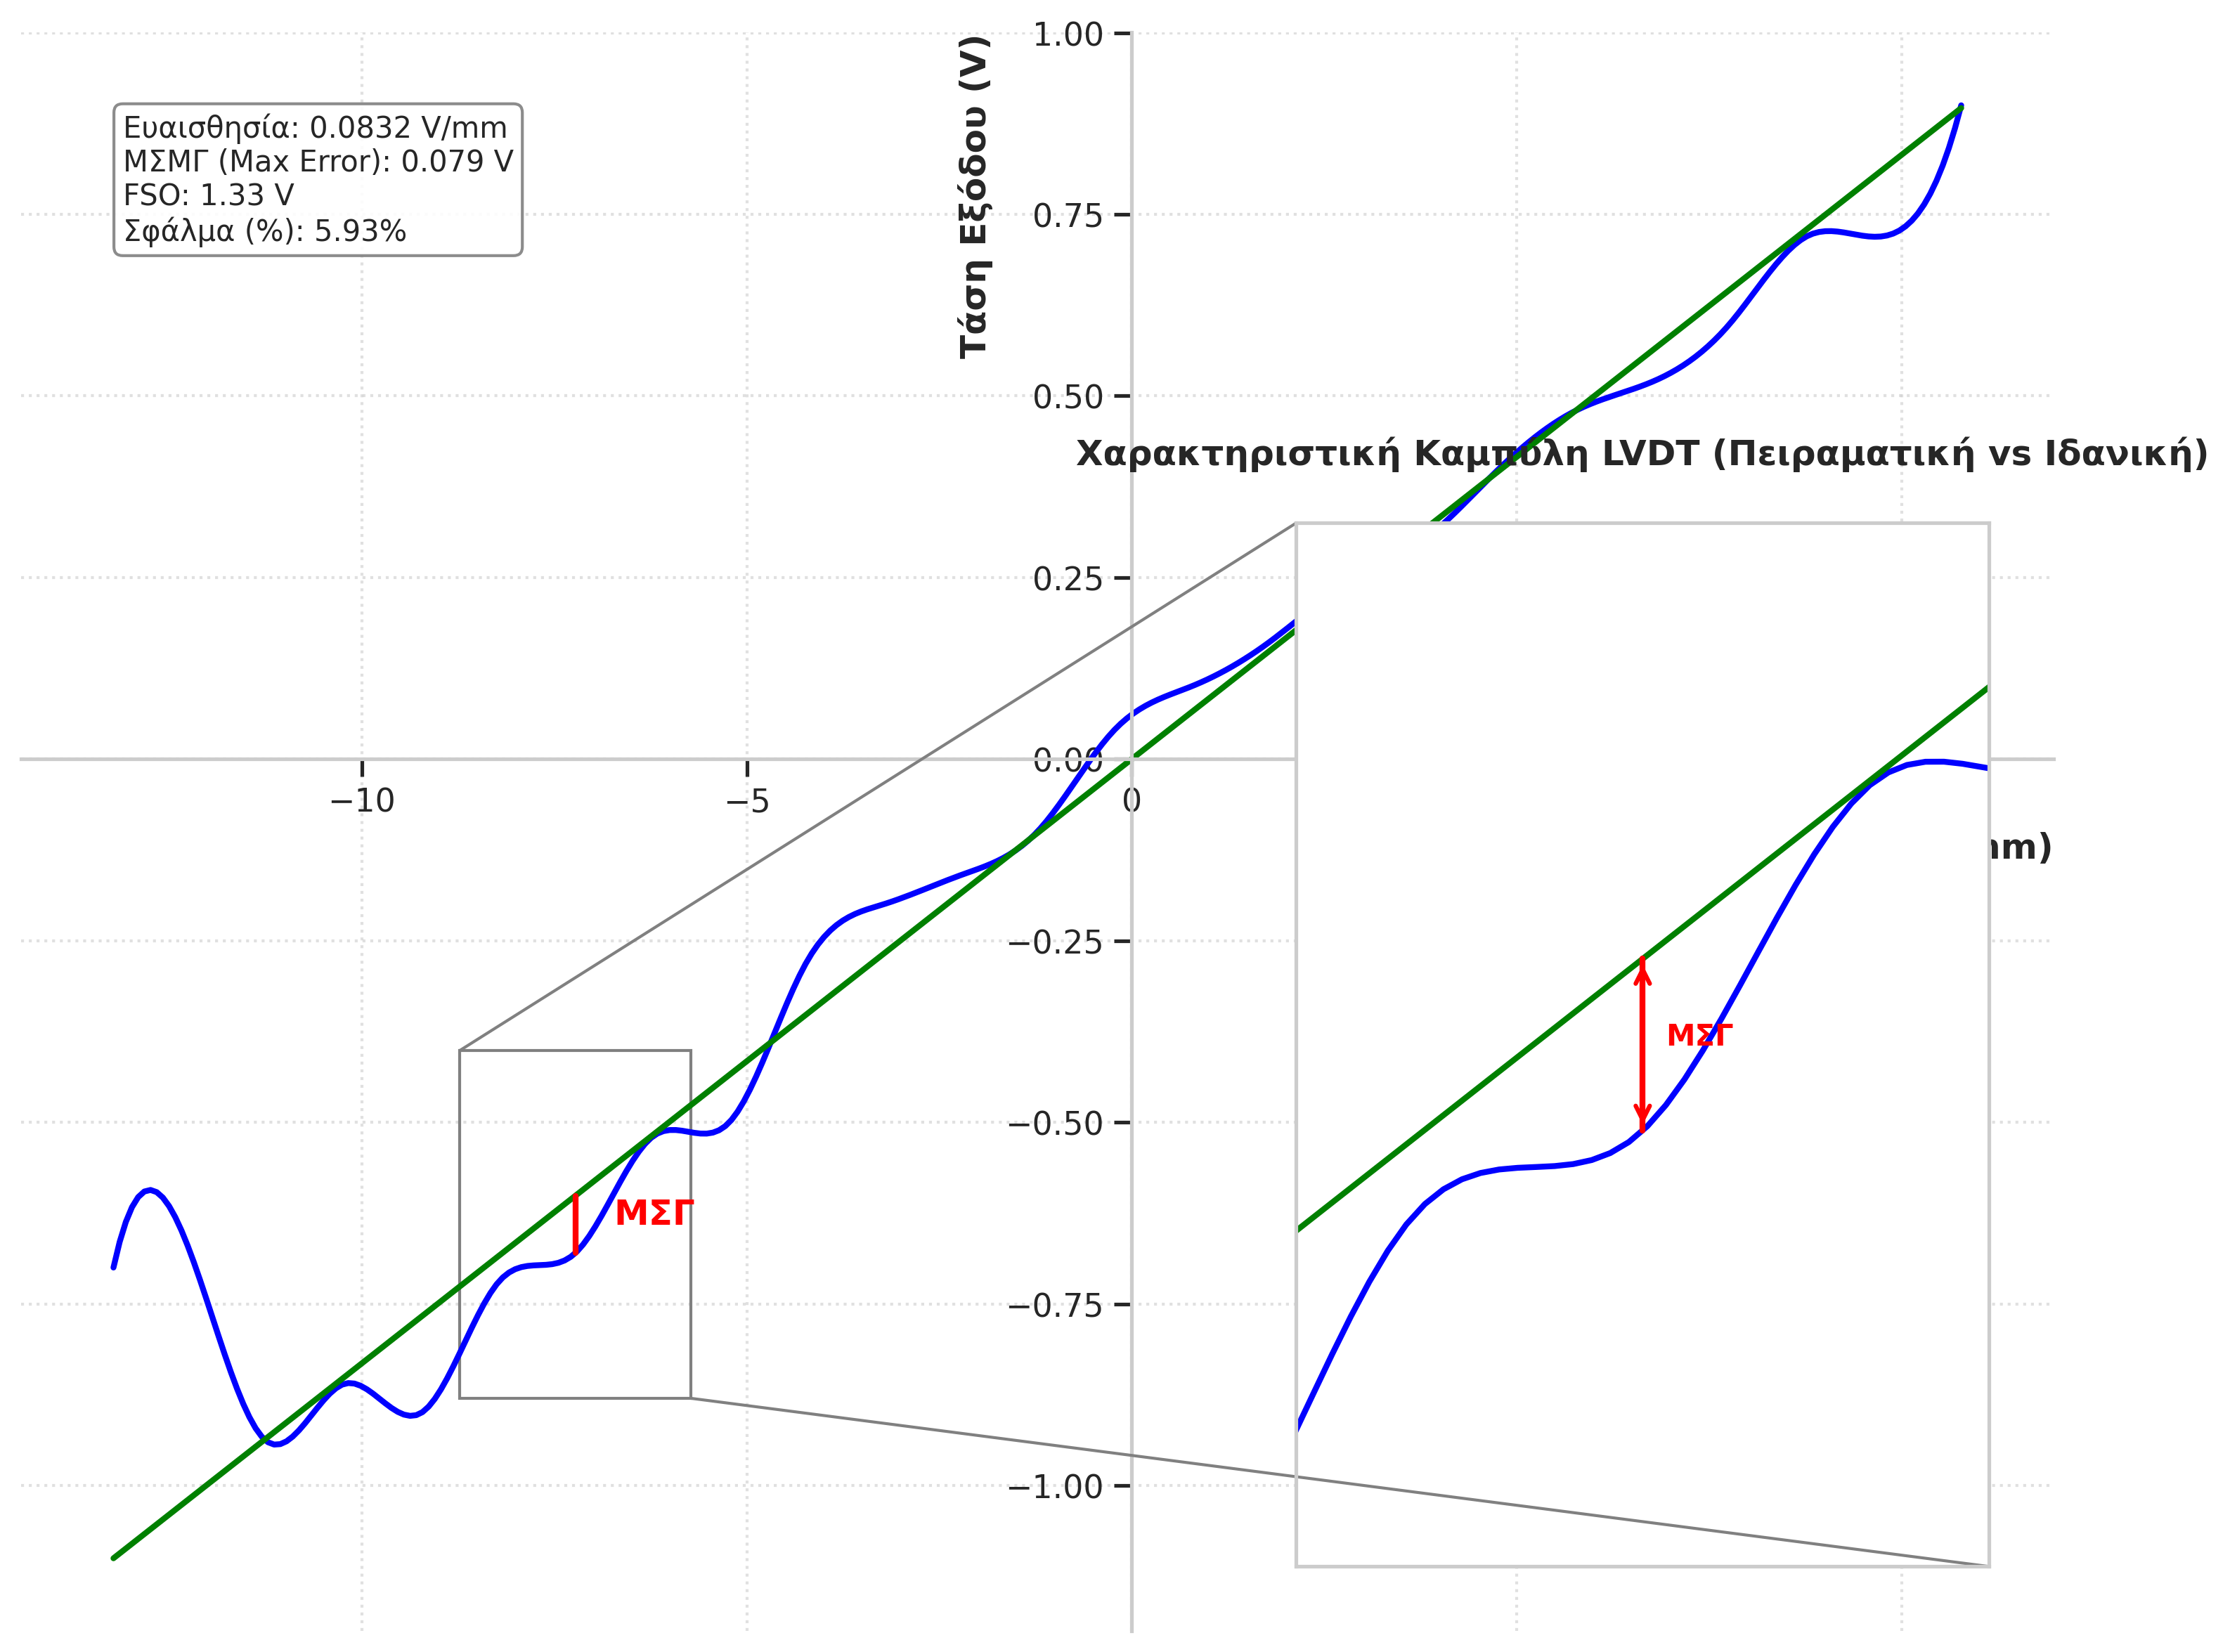

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# ==========================================
# 1. ΡΥΘΜΙΣΕΙΣ ΥΨΗΛΗΣ ΑΝΑΛΥΣΗΣ
# ==========================================
plt.rcParams['figure.dpi'] = 300        # Υψηλή ανάλυση για οθόνη
plt.rcParams['savefig.dpi'] = 300       # Υψηλή ανάλυση για αποθήκευση
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12

# ==========================================
# 2. ΔΕΔΟΜΕΝΑ & ΕΠΕΞΕΡΓΑΣΙΑ
# ==========================================
data = {
    'Position_raw': [25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
                     13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Voltage': [0.9, 0.72, 0.72, 0.6, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16, 0.1, 0.04,
                0.1, 0.16, 0.2, 0.28, 0.5, 0.52, 0.68, 0.72, 0.9, 0.86, 0.94, 0.68, 0.70],
    'Phase':   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
}

df = pd.DataFrame(data)

# 1. Πρόσημο βάσει φάσης
df['V_signed'] = df.apply(lambda row: -row['Voltage'] if row['Phase'] == 180 else row['Voltage'], axis=1)

# 2. Ταξινόμηση (σημαντικό για την καμπύλη spline)
df = df.sort_values(by='Position_raw')

# 3. Εύρεση Γραμμικής Περιοχής (6mm εως 22mm)
linear_mask = (df['Position_raw'] >= 6) & (df['Position_raw'] <= 22)
df_linear = df[linear_mask]

# 4. Υπολογισμός Ευθείας & Κεντροποίηση Άξονα
# Βρίσκουμε την ευθεία y = ax + b στα αρχικά δεδομένα
slope, intercept = np.polyfit(df_linear['Position_raw'], df_linear['V_signed'], 1)

# Βρίσκουμε το σημείο μηδενισμού (Null Point) για να κεντράρουμε το γράφημα
# 0 = slope * x + intercept => x_null = -intercept / slope
null_point = -intercept / slope

# Δημιουργούμε τον νέο άξονα "Μετατόπιση (mm)" με το 0 στο κέντρο
df['Displacement'] = df['Position_raw'] - null_point
df_linear = df[linear_mask].copy()
df_linear['Displacement'] = df_linear['Position_raw'] - null_point

# Ξανα-υπολογίζουμε την ευθεία με τα κεντραρισμένα δεδομένα (τώρα το intercept θα είναι σχεδόν 0)
slope_new, intercept_new = np.polyfit(df_linear['Displacement'], df_linear['V_signed'], 1)

# ==========================================
# 3. ΔΗΜΙΟΥΡΓΙΑ SMOOTH ΚΑΜΠΥΛΗΣ (Spline)
# ==========================================
# Δημιουργούμε πολλά σημεία για να φαίνεται λεία η μπλε γραμμή
x_smooth = np.linspace(df['Displacement'].min(), df['Displacement'].max(), 300)
spl = make_interp_spline(df['Displacement'], df['V_signed'], k=3) # k=3 cubic spline
y_smooth = spl(x_smooth)

# Ευθεία γραμμή (Πράσινη)
y_linear_fit = slope_new * x_smooth + intercept_new

# ==========================================
# 4. ΣΧΕΔΙΑΣΗ ΓΡΑΦΗΜΑΤΟΣ
# ==========================================
fig, ax = plt.subplots(figsize=(10, 8))

# --- Ρύθμιση Αξόνων στο Κέντρο (Στυλ Αναφοράς) ---
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Προσθήκη Grid
ax.grid(True, linestyle=':', alpha=0.6)

# --- Plotting ---
# 1. Μπλε Καμπύλη (Πειραματική - Smooth)
ax.plot(x_smooth, y_smooth, color='blue', linewidth=2, label='Πειραματική Καμπύλη')

# 2. Πράσινη Ευθεία (Ιδανική)
ax.plot(x_smooth, y_linear_fit, color='green', linewidth=2, label='Βέλτιστη Ευθεία')

# --- Υπολογισμός & Σήμανση ΜΣΓ (Max Error) ---
# Βρίσκουμε το μέγιστο σφάλμα ΜΕΣΑ στη γραμμική περιοχή
df_linear['Predicted'] = slope_new * df_linear['Displacement'] + intercept_new
df_linear['Error'] = abs(df_linear['V_signed'] - df_linear['Predicted'])
max_err_idx = df_linear['Error'].idxmax()
x_err = df_linear.loc[max_err_idx, 'Displacement']
y_err_data = df_linear.loc[max_err_idx, 'V_signed']
y_err_pred = df_linear.loc[max_err_idx, 'Predicted']
max_error_val = df_linear.loc[max_err_idx, 'Error']

# Σχεδίαση Κόκκινης Γραμμής Σφάλματος στο κυρίως γράφημα
ax.plot([x_err, x_err], [y_err_data, y_err_pred], color='red', linewidth=2)
ax.text(x_err + 0.5, (y_err_data + y_err_pred)/2, 'ΜΣΓ', color='red', fontweight='bold')

# ==========================================
# 5. ZOOM INSET (Το "Κουτάκι" Μεγέθυνσης)
# ==========================================
# Δημιουργία του inset axis
axins = zoomed_inset_axes(ax, zoom=3, loc='lower right', borderpad=2)

# Ξανα-σχεδιάζουμε τα ίδια μέσα στο μικρό κουτί
axins.plot(x_smooth, y_smooth, color='blue', linewidth=2)
axins.plot(x_smooth, y_linear_fit, color='green', linewidth=2)

# Στοχεύουμε την περιοχή του σφάλματος
x1, x2 = x_err - 1.5, x_err + 1.5
y1, y2 = min(y_err_data, y_err_pred) - 0.2, max(y_err_data, y_err_pred) + 0.2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Σχεδίαση του σφάλματος και μέσα στο Zoom
axins.plot([x_err, x_err], [y_err_data, y_err_pred], color='red', linewidth=2)
# Βελάκια για το ΜΣΓ μέσα στο zoom
axins.annotate('', xy=(x_err, y_err_data), xytext=(x_err, y_err_pred),
            arrowprops=dict(arrowstyle='<->', color='red', lw=1.5))
axins.text(x_err + 0.1, (y_err_data + y_err_pred)/2, 'ΜΣΓ', color='red', fontsize=10, fontweight='bold')

# Απόκρυψη ticks στο zoom για καθαρότητα
axins.set_xticks([])
axins.set_yticks([])

# Γραμμές που συνδέουν το zoom με το γράφημα
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# ==========================================
# 6. LEGEND BOX & ΤΙΤΛΟΙ
# ==========================================
# Τίτλοι αξόνων στις άκρες
ax.set_xlabel('Μετατόπιση (mm)', loc='right', fontweight='bold')
ax.set_ylabel('Τάση Εξόδου (V)', loc='top', fontweight='bold')

# Στατιστικά
stats_text = (
    f"Ευαισθησία: {slope_new:.4f} V/mm\n"
    f"ΜΣΜΓ (Max Error): {max_error_val:.3f} V\n"
    f"FSO: {abs(slope_new * (22-6)):.2f} V\n"
    f"Σφάλμα (%): {(max_error_val / abs(slope_new * (22-6)) * 100):.2f}%"
)

# Προσθήκη κουτιού κειμένου (πάνω αριστερά)
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray')
ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.title('Χαρακτηριστική Καμπύλη LVDT (Πειραματική vs Ιδανική)', pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4066691780.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df['Predicted_V'] = polynomial(linear_df['Thesi_mm'])
/tmp/ipython-input-4066691780.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df['Error'] = abs(linear_df['Tasi_Final'] - linear_df['Predicted_V'])


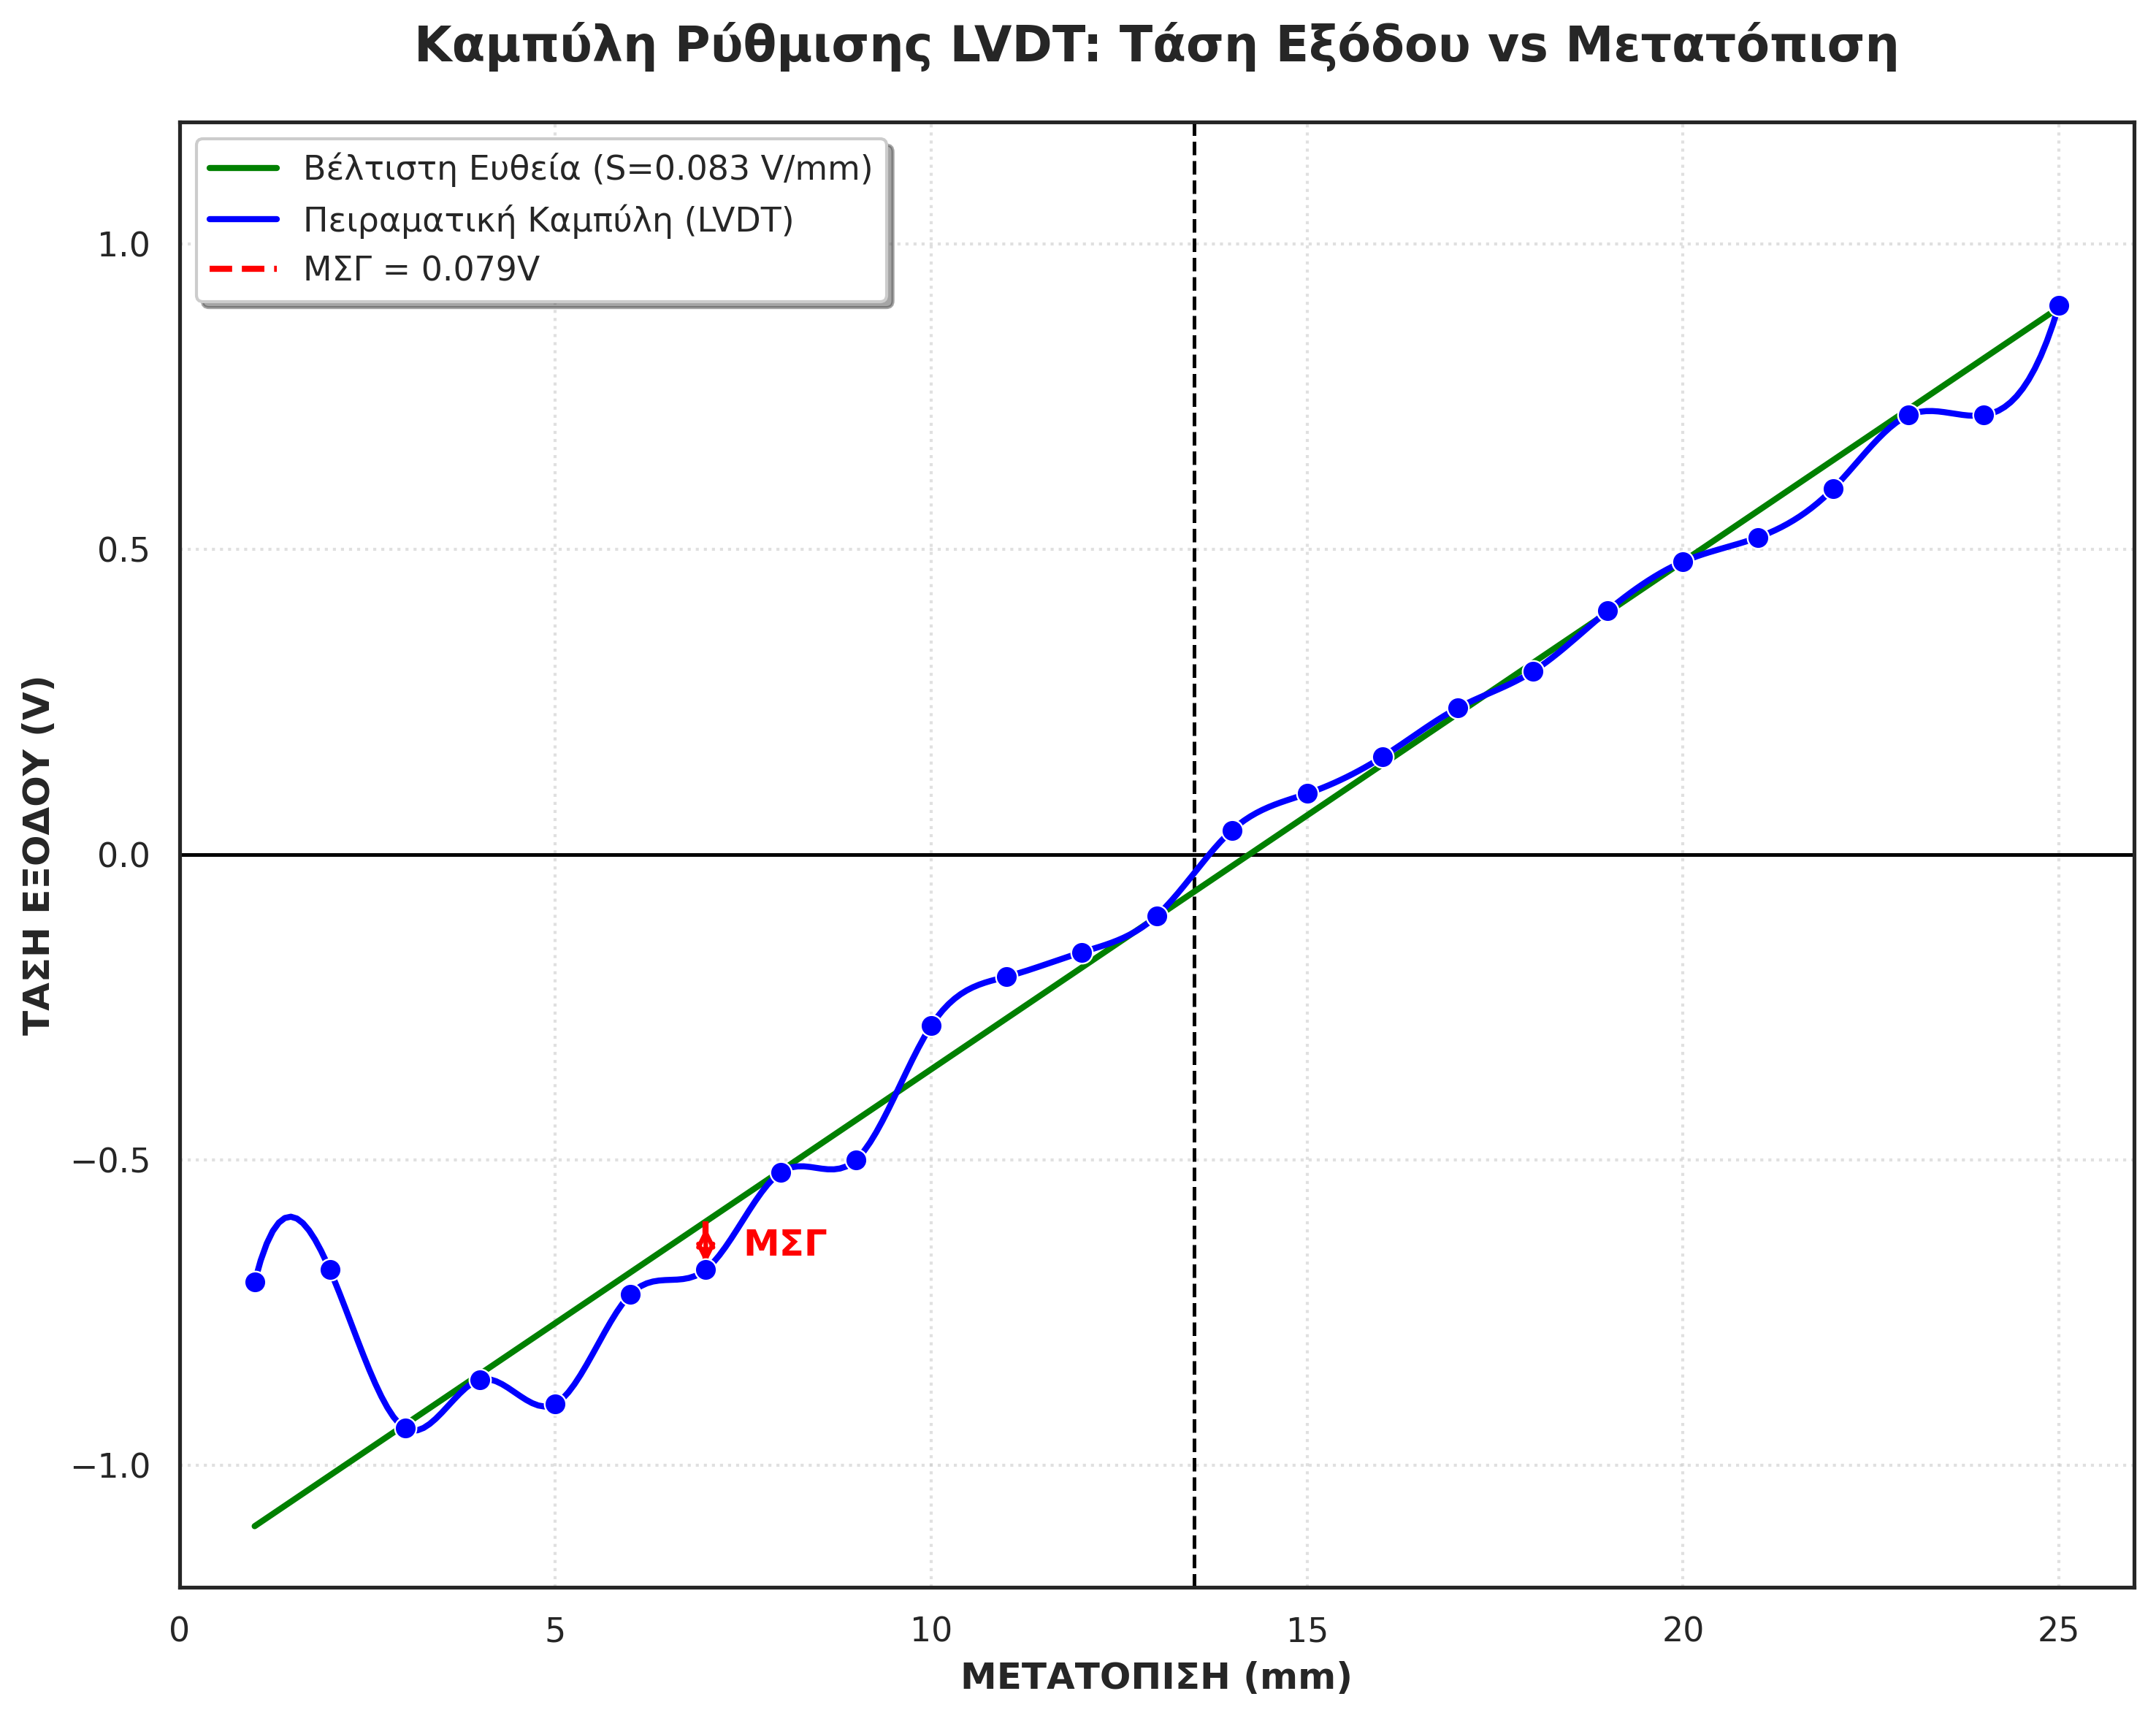

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. ΕΙΣΑΓΩΓΗ ΔΕΔΟΜΕΝΩΝ (Από τον Πίνακα 1 του LaTeX)
# ----------------------------------------------------
data = {
    'Thesi_mm': [
        25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
        15, 14, 13, 12, 11, 10, 9, 8, 7, 6,
        5, 4, 3, 2, 1
    ],
    'Tasi_Vpp': [
        0.90, 0.72, 0.72, 0.60, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16,
        0.10, 0.04, 0.10, 0.16, 0.20, 0.28, 0.50, 0.52, 0.68, 0.72,
        0.90, 0.86, 0.94, 0.68, 0.70
    ],
    'Fasi_deg': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 180, 180, 180, 180, 180, 180, 180, 180,
        180, 180, 180, 180, 180
    ]
}

df = pd.DataFrame(data)

# 2. ΕΠΕΞΕΡΓΑΣΙΑ ΔΕΔΟΜΕΝΩΝ
# ----------------------------------------------------
# Αν η φάση είναι 180, η τάση γίνεται αρνητική
df['Tasi_Final'] = df.apply(lambda row: row['Tasi_Vpp'] if row['Fasi_deg'] == 0 else -row['Tasi_Vpp'], axis=1)

# Ορισμός Γραμμικής Περιοχής (όπως στο LaTeX: 6mm έως 22mm)
linear_df = df[(df['Thesi_mm'] >= 6) & (df['Thesi_mm'] <= 22)]

# Υπολογισμός Βέλτιστης Ευθείας (y = ax + b) στη γραμμική περιοχή
coefficients = np.polyfit(linear_df['Thesi_mm'], linear_df['Tasi_Final'], 1)
slope = coefficients[0] # Κλίση (Ευαισθησία)
intercept = coefficients[1]
polynomial = np.poly1d(coefficients)

# Δημιουργία δεδομένων για την ευθεία (για όλο το εύρος του γραφήματος)
x_line = np.linspace(df['Thesi_mm'].min(), df['Thesi_mm'].max(), 100)
y_line = polynomial(x_line)

# 3. ΥΠΟΛΟΓΙΣΜΟΣ ΜΕΓΙΣΤΟΥ ΣΦΑΛΜΑΤΟΣ (ΜΣΓ)
# ----------------------------------------------------
# Υπολογίζουμε την προβλεπόμενη τιμή για κάθε σημείο της γραμμικής περιοχής
linear_df['Predicted_V'] = polynomial(linear_df['Thesi_mm'])
linear_df['Error'] = abs(linear_df['Tasi_Final'] - linear_df['Predicted_V'])

# Βρίσκουμε το σημείο με το μέγιστο σφάλμα
max_error_row = linear_df.loc[linear_df['Error'].idxmax()]
max_err_x = max_error_row['Thesi_mm']
max_err_y_true = max_error_row['Tasi_Final']
max_err_y_pred = max_error_row['Predicted_V']
max_error_val = max_error_row['Error']

# 4. ΔΗΜΙΟΥΡΓΙΑ ΓΡΑΦΗΜΑΤΟΣ (Seaborn & Matplotlib)
# ----------------------------------------------------
sns.set_style("white") # Καθαρό στυλ
plt.figure(figsize=(10, 8))

# Κεντρικοί άξονες (X και Y στο 0, όπως στο διάγραμμα LVDT)
plt.axhline(0, color='black', linewidth=1.2)
plt.axvline(13.5, color='black', linewidth=1.2, linestyle='--') # Περίπου εκεί είναι το μηδέν της μετατόπισης με βάση τα δεδομένα

# Σχεδίαση Βέλτιστης Ευθείας (Πράσινη)
plt.plot(x_line, y_line, color='green', label=f'Βέλτιστη Ευθεία (S={slope:.3f} V/mm)', linewidth=2)

# Σχεδίαση Πειραματικής Καμπύλης (Μπλε με Spline interpolation για ομαλότητα)
from scipy.interpolate import make_interp_spline
x_smooth = np.linspace(df['Thesi_mm'].min(), df['Thesi_mm'].max(), 300)
spl = make_interp_spline(df['Thesi_mm'][::-1], df['Tasi_Final'][::-1], k=3) # Reverse επειδή το x πρέπει να είναι αύξον
y_smooth = spl(x_smooth)
plt.plot(x_smooth, y_smooth, color='blue', label='Πειραματική Καμπύλη (LVDT)', linewidth=2)

# Σχεδίαση των πραγματικών σημείων (κουκκίδες)
sns.scatterplot(data=df, x='Thesi_mm', y='Tasi_Final', color='blue', s=50, zorder=5)

# 5. ΟΠΤΙΚΟΠΟΙΗΣΗ ΣΦΑΛΜΑΤΟΣ (Το "Zoom" βελάκι)
# ----------------------------------------------------
# Σχεδίαση κόκκινης γραμμής που δείχνει το σφάλμα
plt.plot([max_err_x, max_err_x], [max_err_y_true, max_err_y_pred],
         color='red', linestyle='--', linewidth=2, label=f'ΜΣΓ = {max_error_val:.3f}V')

# Προσθήκη βελών (Arrows) πάνω και κάτω
plt.annotate('', xy=(max_err_x, max_err_y_true), xytext=(max_err_x, max_err_y_pred),
             arrowprops=dict(arrowstyle='<->', color='red', lw=1.5))

# Κείμενο δίπλα στο σφάλμα
plt.text(max_err_x + 0.5, (max_err_y_true + max_err_y_pred)/2,
         'ΜΣΓ', color='red', fontsize=12, fontweight='bold', va='center')


# 6. ΜΟΡΦΟΠΟΙΗΣΗ (LABELS, GRID, TITLES)
# ----------------------------------------------------
plt.title('Καμπύλη Ρύθμισης LVDT: Τάση Εξόδου vs Μετατόπιση', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('ΜΕΤΑΤΟΠΙΣΗ (mm)', fontsize=12, fontweight='bold')
plt.ylabel('ΤΑΣΗ ΕΞΟΔΟΥ (V)', fontsize=12, fontweight='bold')

# Προσθήκη πλαισίου (Box)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper left', frameon=True, shadow=True)

# Ρύθμιση ορίων (για να φαίνεται καθαρά)
plt.ylim(-1.2, 1.2)
plt.xlim(0, 26)

plt.tight_layout()
plt.show()

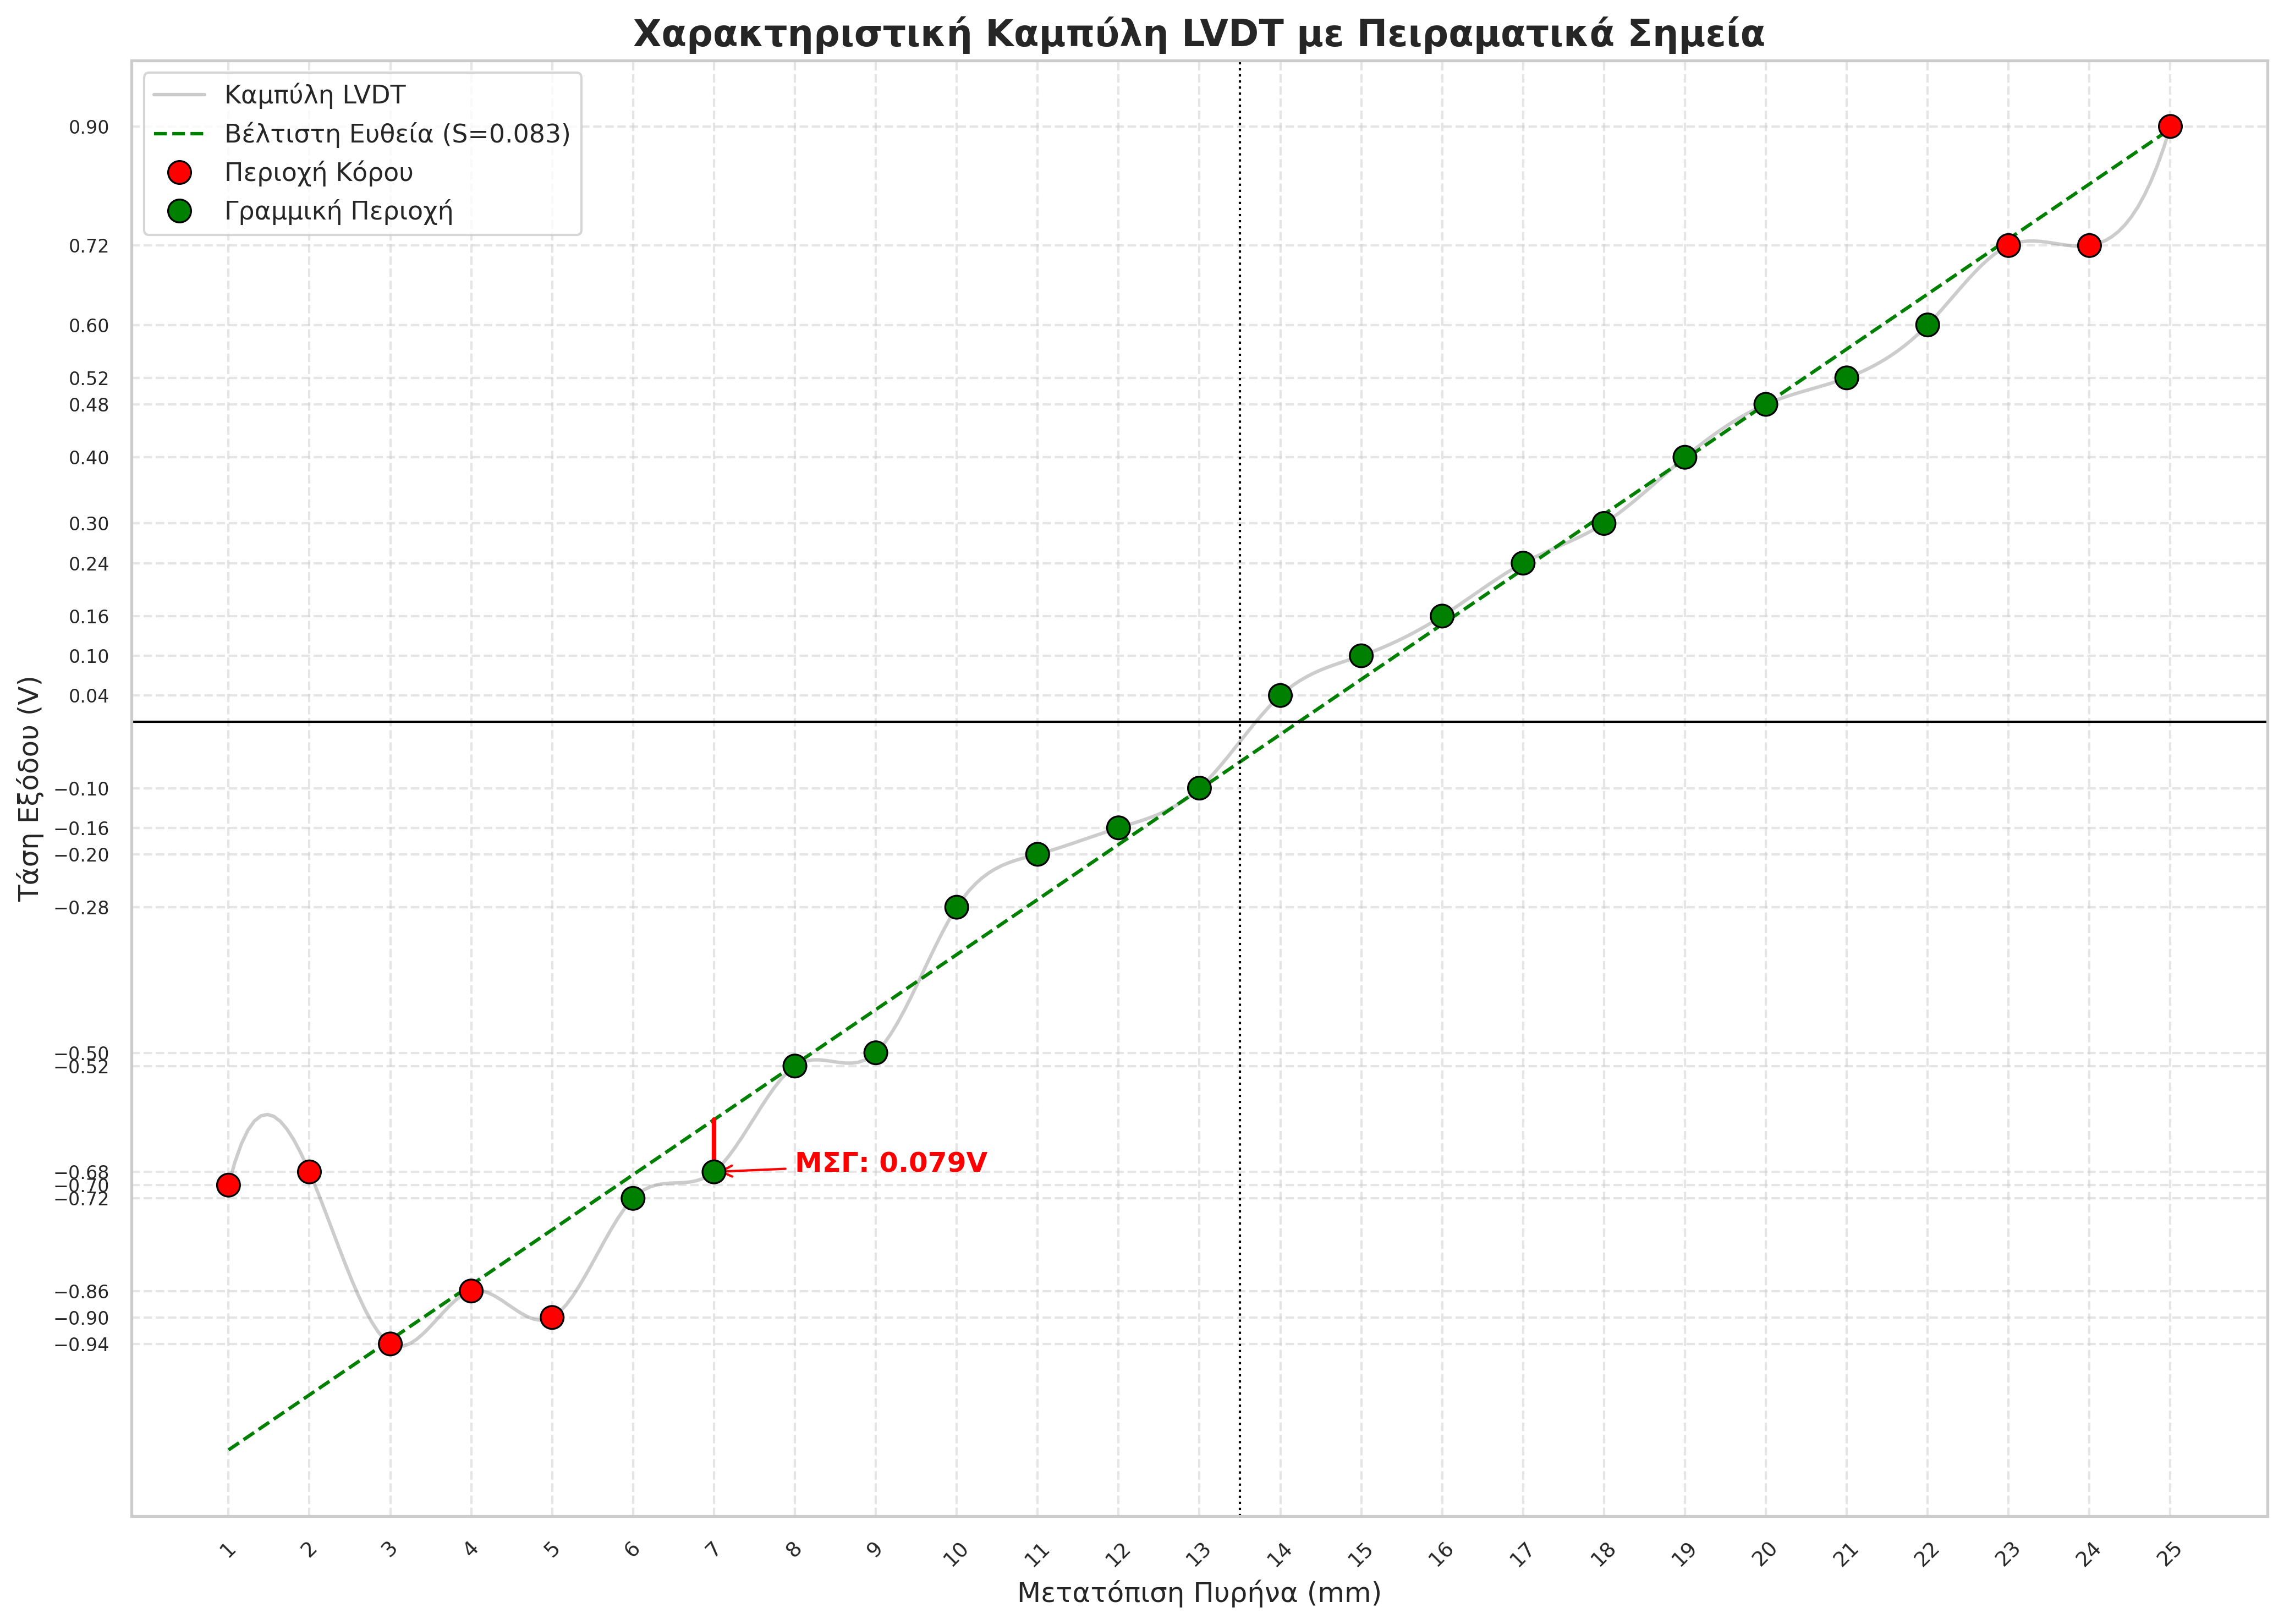

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# ==========================================
# 1. ΕΙΣΑΓΩΓΗ ΚΑΙ ΠΡΟΕΤΟΙΜΑΣΙΑ ΔΕΔΟΜΕΝΩΝ
# ==========================================
data = {
    'Thesi_mm': [
        25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
        15, 14, 13, 12, 11, 10, 9, 8, 7, 6,
        5, 4, 3, 2, 1
    ],
    'Tasi_Vpp': [
        0.90, 0.72, 0.72, 0.60, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16,
        0.10, 0.04, 0.10, 0.16, 0.20, 0.28, 0.50, 0.52, 0.68, 0.72,
        0.90, 0.86, 0.94, 0.68, 0.70
    ],
    'Fasi_deg': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 180, 180, 180, 180, 180, 180, 180, 180,
        180, 180, 180, 180, 180
    ]
}

df = pd.DataFrame(data)

# Διόρθωση προσήμου βάσει φάσης
df['Tasi_Final'] = df.apply(lambda row: row['Tasi_Vpp'] if row['Fasi_deg'] == 0 else -row['Tasi_Vpp'], axis=1)

# Κατηγοριοποίηση: Είναι το σημείο στη Γραμμική Περιοχή (6-22mm) ή στον Κόρο;
df['Region'] = df['Thesi_mm'].apply(lambda x: 'Γραμμική Περιοχή' if 6 <= x <= 22 else 'Περιοχή Κόρου')

# Διαχωρισμός DataFrames για ευκολία στους υπολογισμούς
linear_df = df[df['Region'] == 'Γραμμική Περιοχή']

# ==========================================
# 2. ΥΠΟΛΟΓΙΣΜΟΙ (ΕΥΘΕΙΑ & ΣΦΑΛΜΑ)
# ==========================================
# Βέλτιστη ευθεία (μόνο στα γραμμικά δεδομένα)
coefficients = np.polyfit(linear_df['Thesi_mm'], linear_df['Tasi_Final'], 1)
slope = coefficients[0]
polynomial = np.poly1d(coefficients)

# Σημεία για σχεδίαση της ευθείας (σε όλο το πλάτος)
x_line = np.linspace(1, 25, 100)
y_line = polynomial(x_line)

# Εύρεση Μέγιστου Σφάλματος (ΜΣΓ)
linear_df = linear_df.copy() # Για να αποφύγουμε warnings
linear_df['Predicted'] = polynomial(linear_df['Thesi_mm'])
linear_df['Error'] = abs(linear_df['Tasi_Final'] - linear_df['Predicted'])
max_err_idx = linear_df['Error'].idxmax()
max_err_x = linear_df.loc[max_err_idx, 'Thesi_mm']
max_err_y_real = linear_df.loc[max_err_idx, 'Tasi_Final']
max_err_y_pred = linear_df.loc[max_err_idx, 'Predicted']
max_err_val = linear_df.loc[max_err_idx, 'Error']

# ==========================================
# 3. ΣΧΕΔΙΑΣΗ ΓΡΑΦΗΜΑΤΟΣ
# ==========================================
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10)) # Μεγάλο μέγεθος για να χωράνε οι αριθμοί

# 3α. Σχεδίαση Καμπύλης (Smooth)
x_smooth = np.linspace(df['Thesi_mm'].min(), df['Thesi_mm'].max(), 300)
spl = make_interp_spline(df['Thesi_mm'][::-1], df['Tasi_Final'][::-1], k=3)
y_smooth = spl(x_smooth)
plt.plot(x_smooth, y_smooth, color='gray', alpha=0.4, label='Καμπύλη LVDT', zorder=1)

# 3β. Σχεδίαση Βέλτιστης Ευθείας
plt.plot(x_line, y_line, color='green', linestyle='--', label=f'Βέλτιστη Ευθεία (S={slope:.3f})', zorder=2)

# 3γ. Σχεδίαση Σημείων με διαφορετικά χρώματα (ΖΗΤΟΥΜΕΝΟ 1)
# Χρησιμοποιούμε το hue για να αλλάξει χρώμα ανάλογα την περιοχή
sns.scatterplot(
    data=df,
    x='Thesi_mm',
    y='Tasi_Final',
    hue='Region',
    palette={'Γραμμική Περιοχή': 'green', 'Περιοχή Κόρου': 'red'},
    s=100, # Μέγεθος κουκκίδας
    edgecolor='black',
    zorder=10
)

# 3δ. Σχεδίαση Σφάλματος (Arrow)
plt.plot([max_err_x, max_err_x], [max_err_y_real, max_err_y_pred], color='red', lw=2)
plt.annotate(f'ΜΣΓ: {max_err_val:.3f}V', xy=(max_err_x, max_err_y_real), xytext=(max_err_x+1, max_err_y_real),
             arrowprops=dict(arrowstyle='->', color='red'), color='red', fontweight='bold')

# ==========================================
# 4. ΡΥΘΜΙΣΗ ΑΞΟΝΩΝ ΜΕ ΠΕΙΡΑΜΑΤΙΚΕΣ ΤΙΜΕΣ (ΖΗΤΟΥΜΕΝΟ 2)
# ==========================================

# Ορίζουμε τα ticks του άξονα Χ να είναι ακριβώς οι θέσεις (mm) που μετρήσαμε
plt.xticks(df['Thesi_mm'], rotation=45, fontsize=9)

# Ορίζουμε τα ticks του άξονα Y να είναι ακριβώς οι τάσεις (V) που μετρήσαμε
# Ταξινομούμε τις τιμές για να μπουν με τη σειρά στον άξονα
y_ticks = sorted(df['Tasi_Final'].unique())
plt.yticks(y_ticks, fontsize=8)

# Προσθήκη κεντρικών αξόνων (σταυρός στο 0,0)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(13.5, color='black', linewidth=1, linestyle=':') # Περίπου στο κέντρο συμμετρίας

# Τίτλοι και labels
plt.title('Χαρακτηριστική Καμπύλη LVDT με Πειραματικά Σημεία', fontsize=16, fontweight='bold')
plt.xlabel('Μετατόπιση Πυρήνα (mm)', fontsize=12)
plt.ylabel('Τάση Εξόδου (V)', fontsize=12)

plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

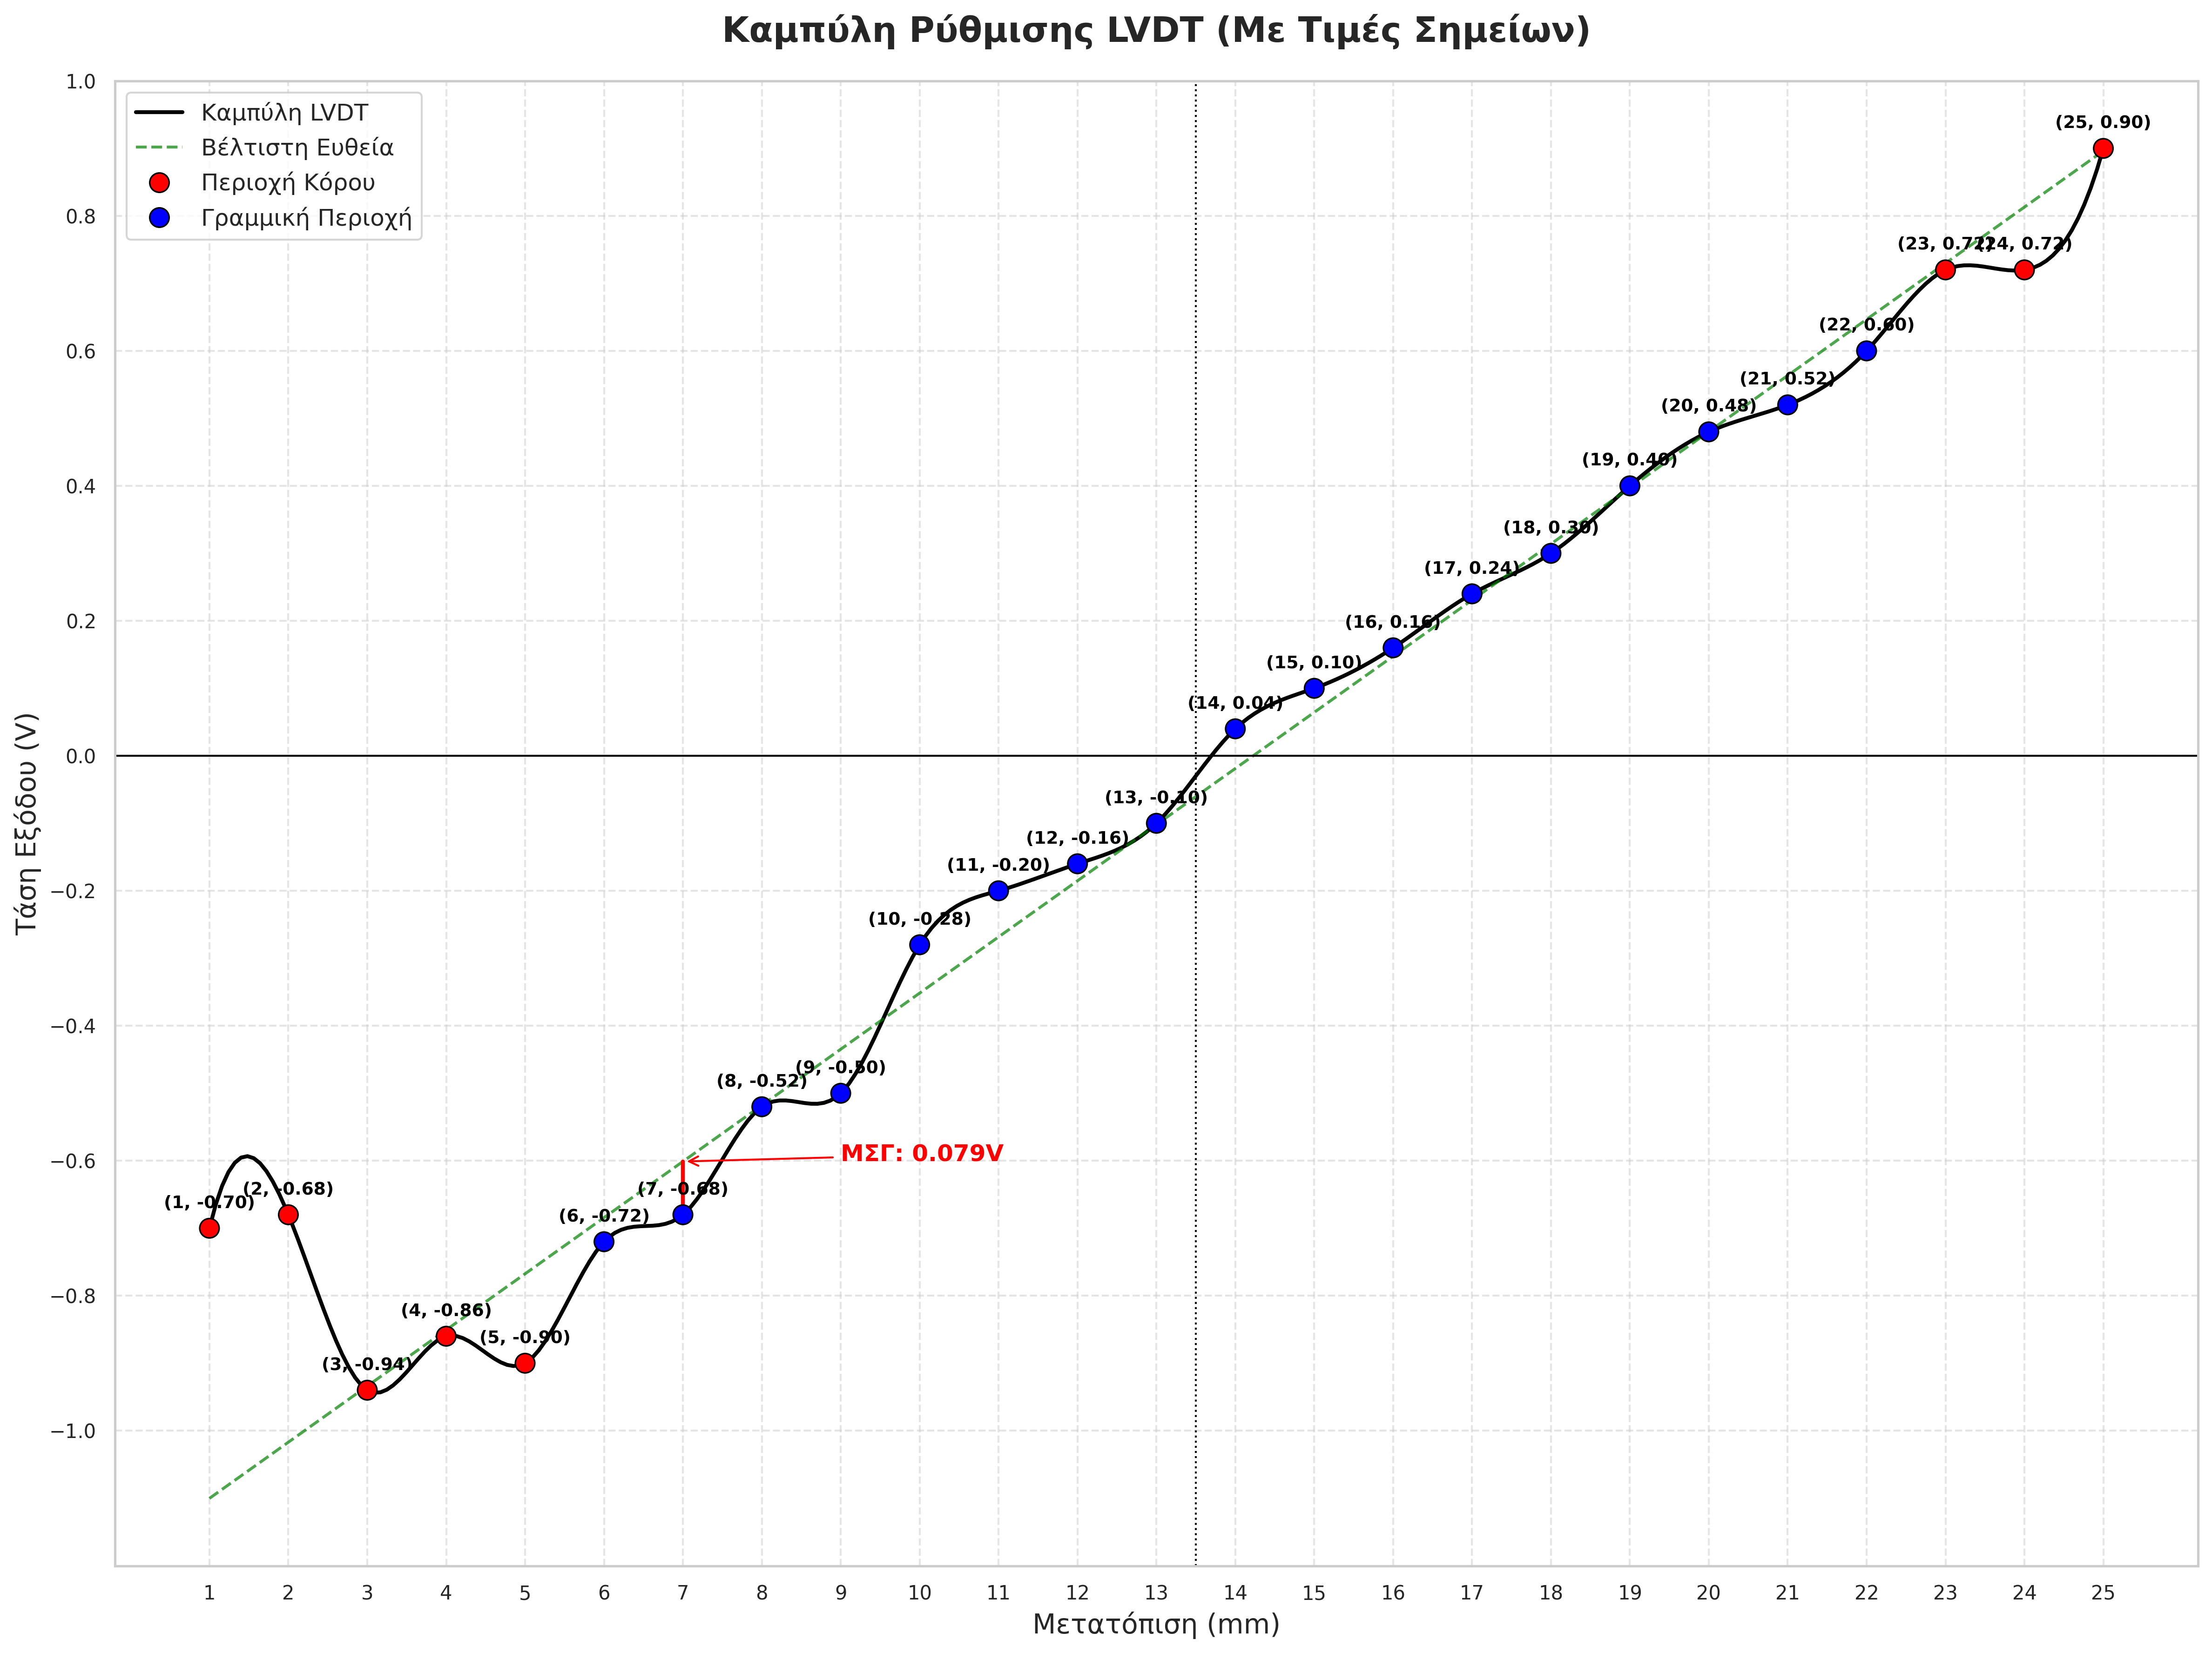

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# ==========================================
# 1. ΕΙΣΑΓΩΓΗ ΚΑΙ ΠΡΟΕΤΟΙΜΑΣΙΑ ΔΕΔΟΜΕΝΩΝ
# ==========================================
data = {
    'Thesi_mm': [
        25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
        15, 14, 13, 12, 11, 10, 9, 8, 7, 6,
        5, 4, 3, 2, 1
    ],
    'Tasi_Vpp': [
        0.90, 0.72, 0.72, 0.60, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16,
        0.10, 0.04, 0.10, 0.16, 0.20, 0.28, 0.50, 0.52, 0.68, 0.72,
        0.90, 0.86, 0.94, 0.68, 0.70
    ],
    'Fasi_deg': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 180, 180, 180, 180, 180, 180, 180, 180,
        180, 180, 180, 180, 180
    ]
}

df = pd.DataFrame(data)

# Διόρθωση προσήμου
df['Tasi_Final'] = df.apply(lambda row: row['Tasi_Vpp'] if row['Fasi_deg'] == 0 else -row['Tasi_Vpp'], axis=1)

# Κατηγοριοποίηση περιοχών
df['Region'] = df['Thesi_mm'].apply(lambda x: 'Γραμμική Περιοχή' if 6 <= x <= 22 else 'Περιοχή Κόρου')
linear_df = df[df['Region'] == 'Γραμμική Περιοχή']

# ==========================================
# 2. ΥΠΟΛΟΓΙΣΜΟΙ (ΕΥΘΕΙΑ & ΣΦΑΛΜΑ)
# ==========================================
coefficients = np.polyfit(linear_df['Thesi_mm'], linear_df['Tasi_Final'], 1)
polynomial = np.poly1d(coefficients)

# Γραμμή για όλο το εύρος
x_line = np.linspace(1, 25, 100)
y_line = polynomial(x_line)

# Εύρεση ΜΣΓ (Μέγιστο Σφάλμα Γραμμικότητας)
linear_df = linear_df.copy()
linear_df['Predicted'] = polynomial(linear_df['Thesi_mm'])
linear_df['Error'] = abs(linear_df['Tasi_Final'] - linear_df['Predicted'])
max_err_idx = linear_df['Error'].idxmax()
max_err_x = linear_df.loc[max_err_idx, 'Thesi_mm']
max_err_y_real = linear_df.loc[max_err_idx, 'Tasi_Final']
max_err_y_pred = linear_df.loc[max_err_idx, 'Predicted']
max_err_val = linear_df.loc[max_err_idx, 'Error']

# ==========================================
# 3. ΣΧΕΔΙΑΣΗ ΓΡΑΦΗΜΑΤΟΣ
# ==========================================
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12)) # Μεγάλο μέγεθος για να χωράνε οι ετικέτες

# 3α. Σχεδίαση Καμπύλης (ΜΑΥΡΗ)
x_smooth = np.linspace(df['Thesi_mm'].min(), df['Thesi_mm'].max(), 300)
spl = make_interp_spline(df['Thesi_mm'][::-1], df['Tasi_Final'][::-1], k=3)
y_smooth = spl(x_smooth)
plt.plot(x_smooth, y_smooth, color='black', linewidth=2, label='Καμπύλη LVDT', zorder=1)

# 3β. Σχεδίαση Βέλτιστης Ευθείας
plt.plot(x_line, y_line, color='green', linestyle='--', alpha=0.7, label='Βέλτιστη Ευθεία', zorder=2)

# 3γ. Σχεδίαση Σημείων (ΜΠΛΕ στη γραμμική, ΚΟΚΚΙΝΑ στον κόρο)
sns.scatterplot(
    data=df,
    x='Thesi_mm',
    y='Tasi_Final',
    hue='Region',
    palette={'Γραμμική Περιοχή': 'blue', 'Περιοχή Κόρου': 'red'}, # Εδώ ορίζουμε το μπλε
    s=100,
    edgecolor='black',
    zorder=10
)

# 3δ. Εμφάνιση Τιμών (x, y) δίπλα σε ΚΑΘΕ σημείο
for i, row in df.iterrows():
    # Φτιάχνουμε το κείμενο π.χ. "(25, 0.9)"
    label_text = f"({int(row['Thesi_mm'])}, {row['Tasi_Final']:.2f})"

    # Βάζουμε το κείμενο λίγο πιο πάνω ή δίπλα από την κουκκίδα για να μη την κρύβει
    plt.text(
        x=row['Thesi_mm'],
        y=row['Tasi_Final'] + 0.03, # Μετατόπιση λίγο προς τα πάνω
        s=label_text,
        fontdict=dict(color='black', size=9, weight='bold'),
        ha='center', # Οριζόντια στοίχιση στο κέντρο
        zorder=15
    )

# 3ε. Σχεδίαση Σφάλματος (Βελάκι ΜΣΓ)
plt.plot([max_err_x, max_err_x], [max_err_y_real, max_err_y_pred], color='red', lw=2)
plt.annotate(f'ΜΣΓ: {max_err_val:.3f}V', xy=(max_err_x, max_err_y_pred), xytext=(max_err_x+2, max_err_y_pred),
             arrowprops=dict(arrowstyle='->', color='red'), color='red', fontweight='bold', fontsize=12)

# ==========================================
# 4. ΜΟΡΦΟΠΟΙΗΣΗ
# ==========================================
# Άξονες στο 0,0
plt.axhline(0, color='black', linewidth=1)
plt.axvline(13.5, color='black', linewidth=1, linestyle=':')

plt.title('Καμπύλη Ρύθμισης LVDT (Με Τιμές Σημείων)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Μετατόπιση (mm)', fontsize=14)
plt.ylabel('Τάση Εξόδου (V)', fontsize=14)

# Ρύθμιση ticks για να φαίνονται όλα καθαρά
plt.xticks(np.arange(1, 26, 1), fontsize=10)
plt.yticks(np.arange(-1.0, 1.2, 0.2), fontsize=10)

plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

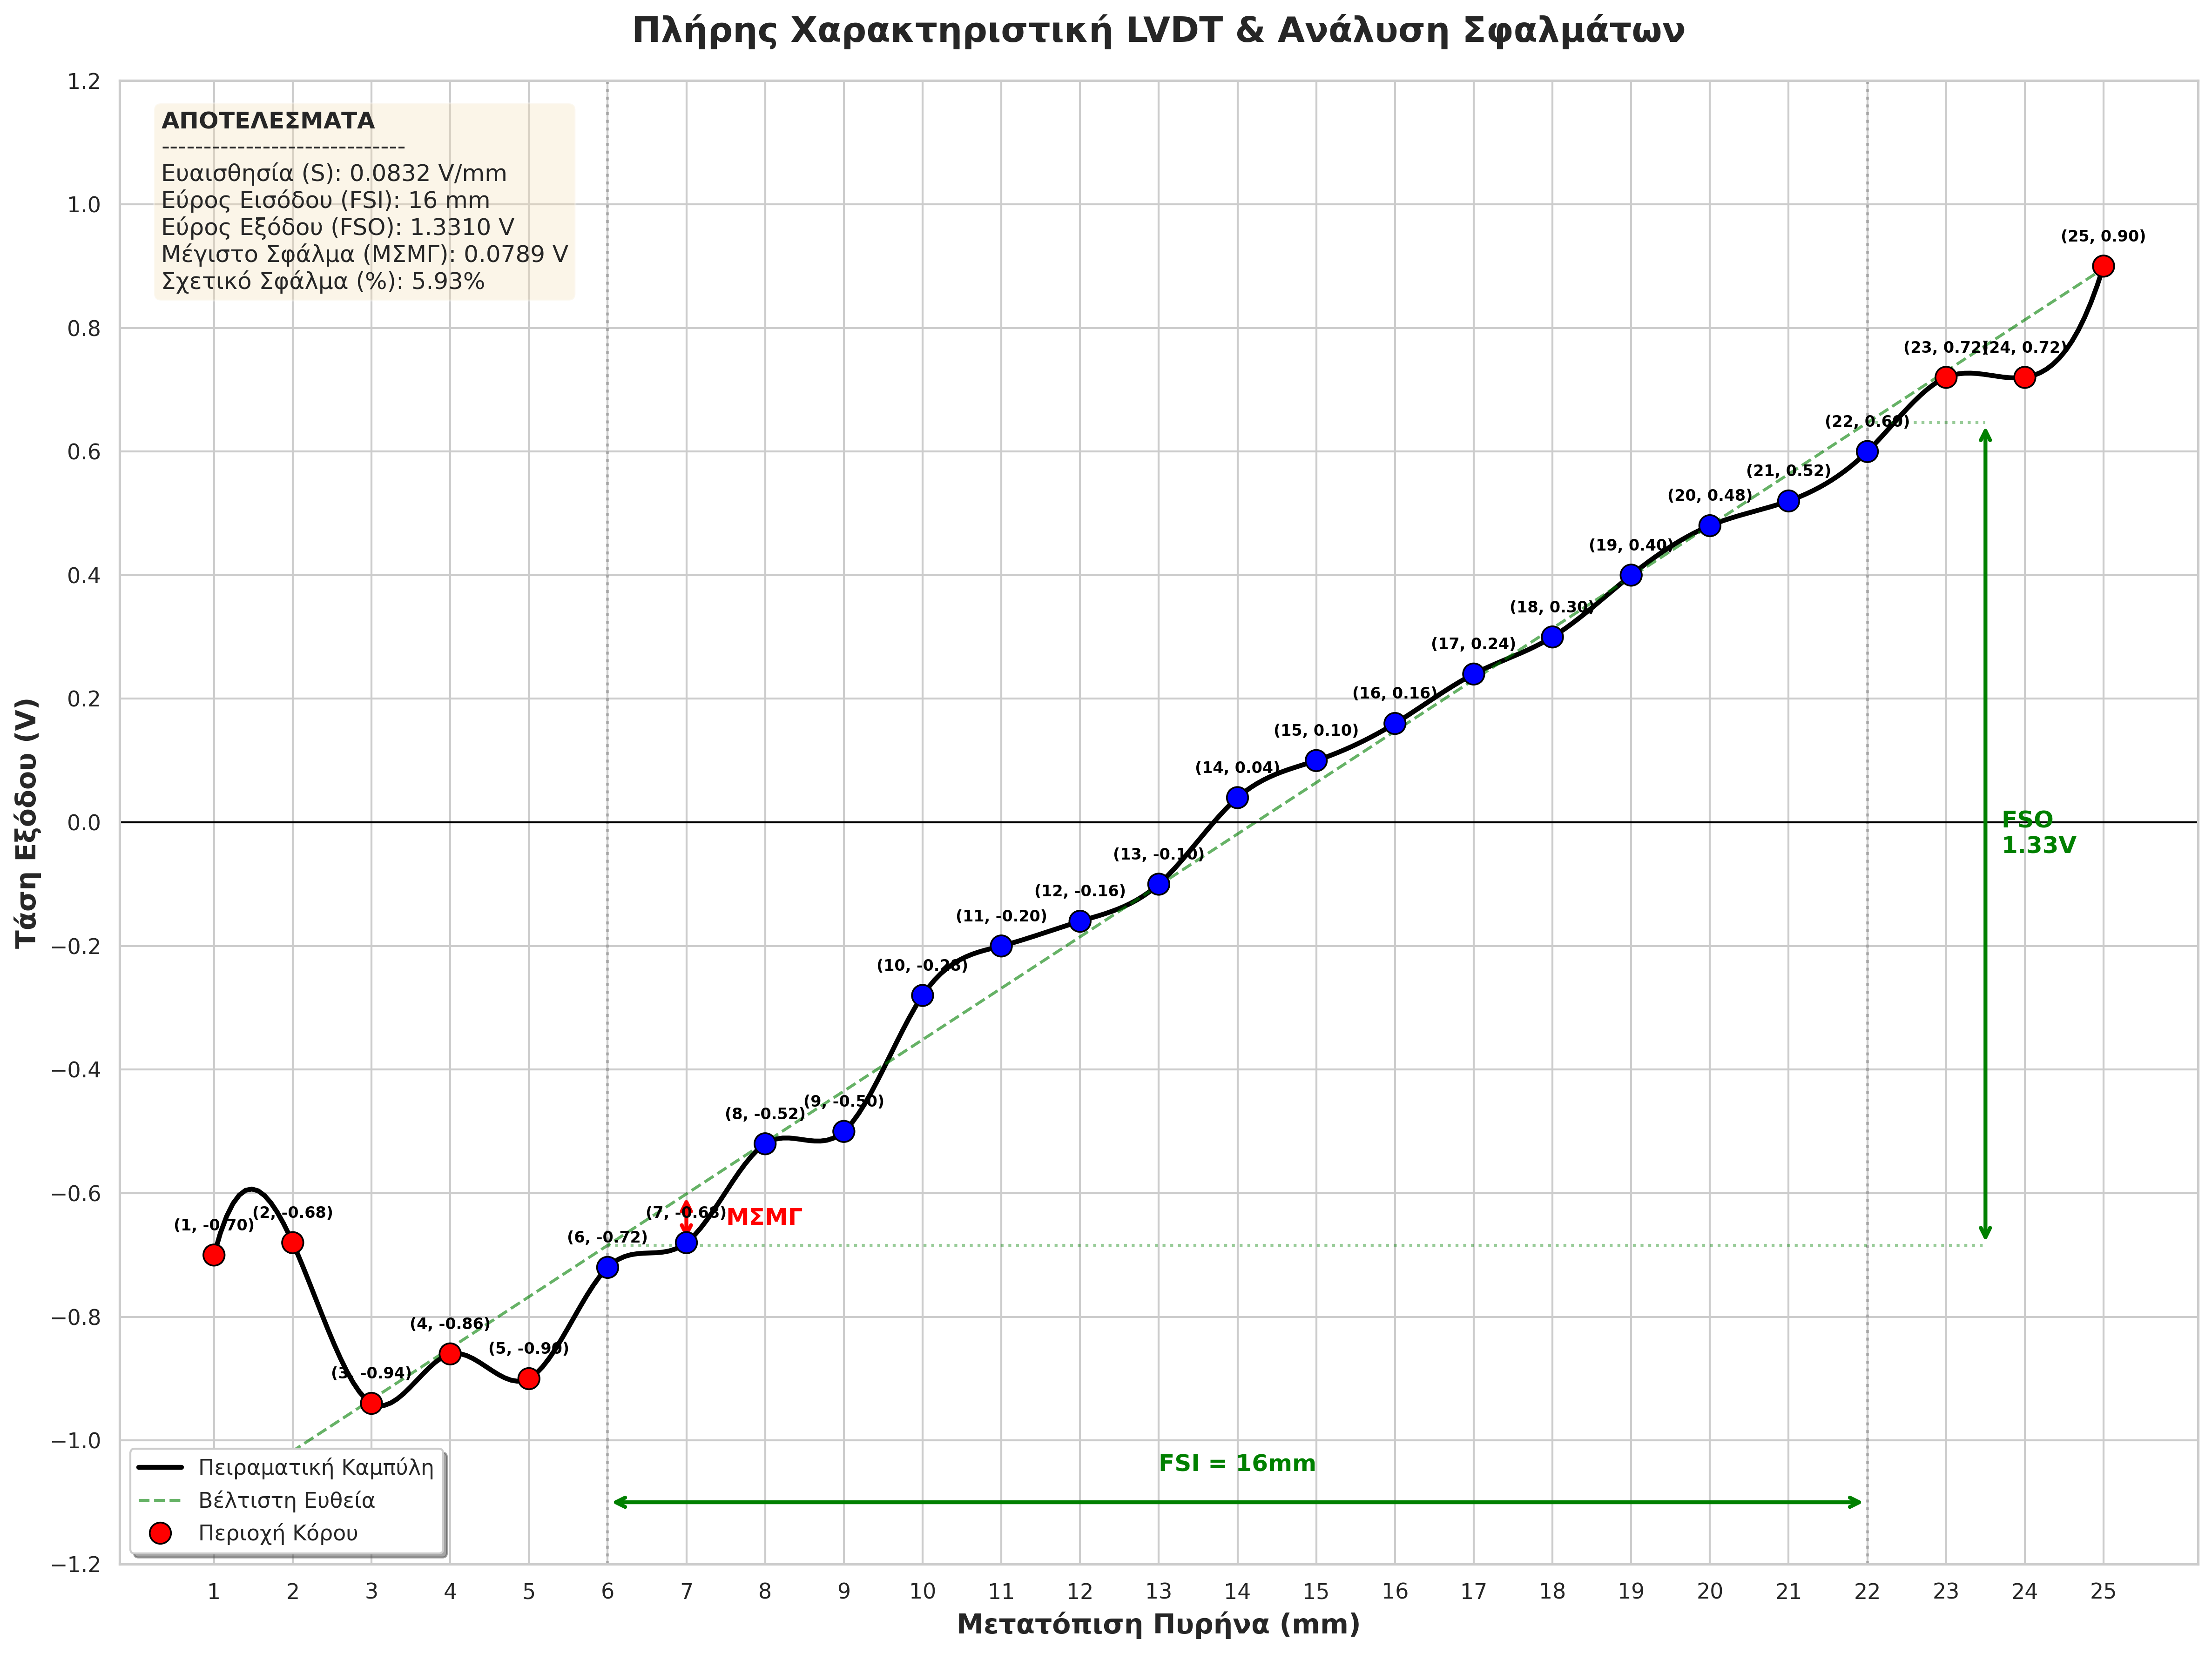

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

# ==========================================
# 1. ΕΙΣΑΓΩΓΗ ΚΑΙ ΠΡΟΕΤΟΙΜΑΣΙΑ ΔΕΔΟΜΕΝΩΝ
# ==========================================
data = {
    'Thesi_mm': [
        25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
        15, 14, 13, 12, 11, 10, 9, 8, 7, 6,
        5, 4, 3, 2, 1
    ],
    'Tasi_Vpp': [
        0.90, 0.72, 0.72, 0.60, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16,
        0.10, 0.04, 0.10, 0.16, 0.20, 0.28, 0.50, 0.52, 0.68, 0.72,
        0.90, 0.86, 0.94, 0.68, 0.70
    ],
    'Fasi_deg': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 180, 180, 180, 180, 180, 180, 180, 180,
        180, 180, 180, 180, 180
    ]
}

df = pd.DataFrame(data)

# Διόρθωση προσήμου (Τάση)
df['Tasi_Final'] = df.apply(lambda row: row['Tasi_Vpp'] if row['Fasi_deg'] == 0 else -row['Tasi_Vpp'], axis=1)

# Ορισμός Ορίων Γραμμικής Περιοχής
LIMIT_MIN_MM = 6
LIMIT_MAX_MM = 22

# Κατηγοριοποίηση
df['Region'] = df['Thesi_mm'].apply(lambda x: 'Γραμμική Περιοχή' if LIMIT_MIN_MM <= x <= LIMIT_MAX_MM else 'Περιοχή Κόρου')
linear_df = df[df['Region'] == 'Γραμμική Περιοχή'].copy()

# ==========================================
# 2. ΥΠΟΛΟΓΙΣΜΟΙ (Sensitivity, FSO, FSI, Error)
# ==========================================
# Βέλτιστη ευθεία
coefficients = np.polyfit(linear_df['Thesi_mm'], linear_df['Tasi_Final'], 1)
slope = coefficients[0]      # Ευαισθησία (Sensitivity)
intercept = coefficients[1]
polynomial = np.poly1d(coefficients)

# Υπολογισμός FSI (Full Scale Input) - Εύρος εισόδου
FSI = LIMIT_MAX_MM - LIMIT_MIN_MM

# Υπολογισμός FSO (Full Scale Output) - Εύρος εξόδου (βάσει της ευθείας στα άκρα)
v_start = polynomial(LIMIT_MIN_MM) # Τάση στα 6mm
v_end = polynomial(LIMIT_MAX_MM)   # Τάση στα 22mm
FSO = abs(v_start - v_end)

# Υπολογισμός ΜΣΜΓ (Μέγιστο Σφάλμα)
linear_df['Predicted'] = polynomial(linear_df['Thesi_mm'])
linear_df['Error'] = abs(linear_df['Tasi_Final'] - linear_df['Predicted'])

max_err_idx = linear_df['Error'].idxmax()
max_err_val = linear_df.loc[max_err_idx, 'Error'] # ΜΣΜΓ
percent_error = (max_err_val / FSO) * 100         # ΜΣΓ %

# Συντεταγμένες σημείου μέγιστου σφάλματος για το γράφημα
err_x = linear_df.loc[max_err_idx, 'Thesi_mm']
err_y_real = linear_df.loc[max_err_idx, 'Tasi_Final']
err_y_pred = linear_df.loc[max_err_idx, 'Predicted']

# ==========================================
# 3. ΣΧΕΔΙΑΣΗ ΓΡΑΦΗΜΑΤΟΣ
# ==========================================
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 12))

# 3α. Καμπύλη LVDT (Μαύρη)
x_smooth = np.linspace(df['Thesi_mm'].min(), df['Thesi_mm'].max(), 300)
spl = make_interp_spline(df['Thesi_mm'][::-1], df['Tasi_Final'][::-1], k=3)
y_smooth = spl(x_smooth)
ax.plot(x_smooth, y_smooth, color='black', linewidth=2.5, label='Πειραματική Καμπύλη', zorder=1)

# 3β. Βέλτιστη Ευθεία (Διακεκομμένη)
x_line = np.linspace(1, 25, 100)
y_line = polynomial(x_line)
ax.plot(x_line, y_line, color='green', linestyle='--', alpha=0.6, label='Βέλτιστη Ευθεία', zorder=2)

# 3γ. Σημεία (Μπλε=Γραμμική, Κόκκινα=Κόρος)
sns.scatterplot(
    data=df, x='Thesi_mm', y='Tasi_Final', hue='Region',
    palette={'Γραμμική Περιοχή': 'blue', 'Περιοχή Κόρου': 'red'},
    s=120, edgecolor='black', zorder=10, ax=ax
)

# 3δ. Ετικέτες Τιμών (x, y)
for i, row in df.iterrows():
    ax.text(
        row['Thesi_mm'], row['Tasi_Final'] + 0.04,
        f"({int(row['Thesi_mm'])}, {row['Tasi_Final']:.2f})",
        color='black', fontsize=8, ha='center', fontweight='bold', zorder=15
    )

# ==========================================
# 4. ΟΠΤΙΚΟΠΟΙΗΣΗ ΜΕΤΡΗΣΕΩΝ (ΒΕΛΗ)
# ==========================================

# --- Βέλος Σφάλματος (ΜΣΜΓ) ---
ax.annotate('', xy=(err_x, err_y_real), xytext=(err_x, err_y_pred),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(err_x + 0.5, (err_y_real + err_y_pred)/2, 'ΜΣΜΓ', color='red', fontweight='bold', va='center')

# --- Βέλος FSI (Οριζόντιο - Είσοδος) ---
# Σχεδιάζουμε κάθετες γραμμές για τα όρια
ax.axvline(LIMIT_MIN_MM, color='gray', linestyle=':', alpha=0.5)
ax.axvline(LIMIT_MAX_MM, color='gray', linestyle=':', alpha=0.5)
# Βέλος χαμηλά στο γράφημα
y_fsi_pos = -1.1 # Θέση στον άξονα Y
ax.annotate('', xy=(LIMIT_MIN_MM, y_fsi_pos), xytext=(LIMIT_MAX_MM, y_fsi_pos),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text((LIMIT_MIN_MM + LIMIT_MAX_MM)/2, y_fsi_pos + 0.05, f'FSI = {FSI}mm',
        color='green', fontweight='bold', ha='center')

# --- Βέλος FSO (Κάθετο - Έξοδος) ---
# Σχεδιάζουμε οριζόντιες γραμμές προβολής από την ευθεία
x_fso_pos = 23.5 # Θέση στον άξονα X (δεξιά)
ax.plot([LIMIT_MIN_MM, x_fso_pos], [v_start, v_start], color='green', linestyle=':', alpha=0.4)
ax.plot([LIMIT_MAX_MM, x_fso_pos], [v_end, v_end], color='green', linestyle=':', alpha=0.4)
# Βέλος
ax.annotate('', xy=(x_fso_pos, v_start), xytext=(x_fso_pos, v_end),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(x_fso_pos + 0.2, (v_start + v_end)/2, f'FSO\n{FSO:.2f}V',
        color='green', fontweight='bold', va='center')


# ==========================================
# 5. ΠΛΑΙΣΙΟ ΠΛΗΡΟΦΟΡΙΩΝ (LEGEND BOX)
# ==========================================
info_text = (
    f"$\\bf{{ΑΠΟΤΕΛΕΣΜΑΤΑ}}$\n"
    f"-----------------------------\n"
    f"Ευαισθησία (S): {abs(slope):.4f} V/mm\n"
    f"Εύρος Εισόδου (FSI): {FSI} mm\n"
    f"Εύρος Εξόδου (FSO): {FSO:.4f} V\n"
    f"Μέγιστο Σφάλμα (ΜΣΜΓ): {max_err_val:.4f} V\n"
    f"Σχετικό Σφάλμα (%): {percent_error:.2f}%"
)

# Τοποθέτηση κουτιού πάνω αριστερά
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# ==========================================
# 6. ΤΕΛΙΚΗ ΜΟΡΦΟΠΟΙΗΣΗ
# ==========================================
ax.axhline(0, color='black', linewidth=1)
ax.set_title('Πλήρης Χαρακτηριστική LVDT & Ανάλυση Σφαλμάτων', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Μετατόπιση Πυρήνα (mm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Τάση Εξόδου (V)', fontsize=14, fontweight='bold')

# Λεπτομερή Ticks
plt.xticks(np.arange(1, 26, 1))
plt.yticks(np.arange(-1.2, 1.4, 0.2))

# Απλό legend για τα σύμβολα μόνο (τα νούμερα είναι στο κουτί)
handles, labels = ax.get_legend_handles_labels()
# Φιλτράρουμε το legend να μην δείχνει τα πάντα, μόνο τα βασικά
ax.legend(handles[:3], labels[:3], loc='lower left', frameon=True, shadow=True)

plt.tight_layout()
plt.show()

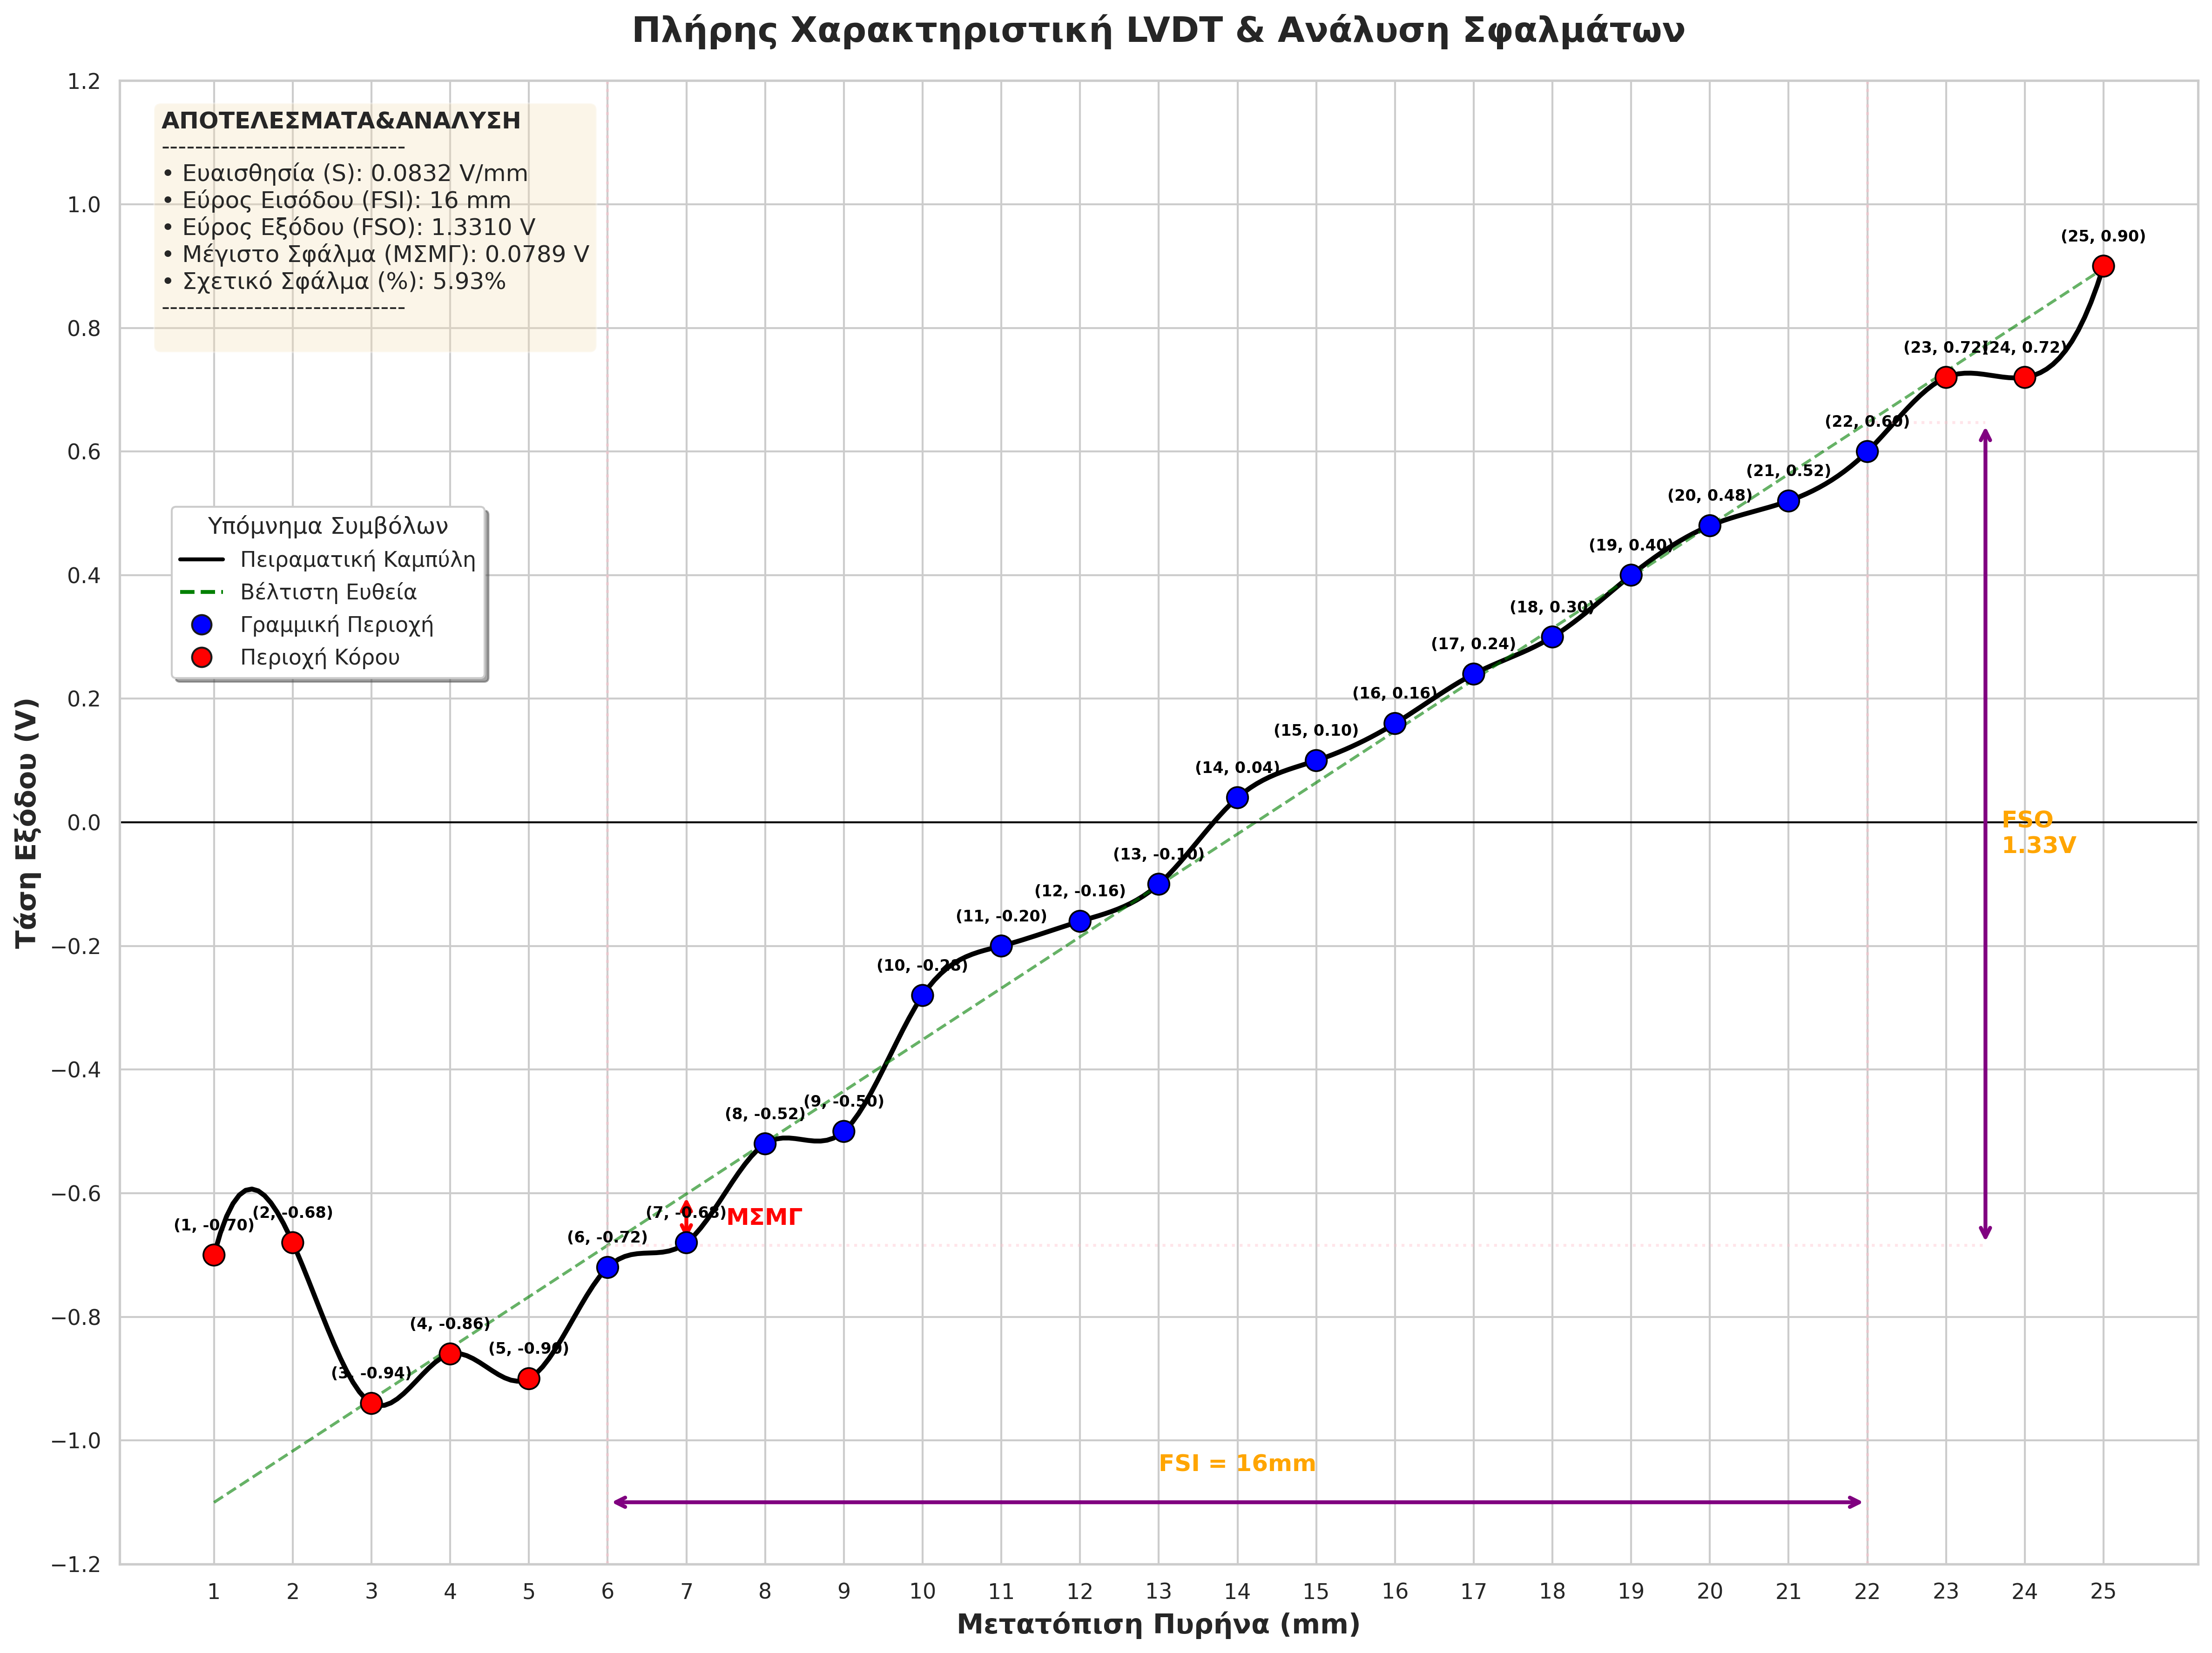

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from scipy.interpolate import make_interp_spline

# ==========================================
# 1. ΕΙΣΑΓΩΓΗ ΚΑΙ ΠΡΟΕΤΟΙΜΑΣΙΑ ΔΕΔΟΜΕΝΩΝ
# ==========================================
data = {
    'Thesi_mm': [
        25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
        15, 14, 13, 12, 11, 10, 9, 8, 7, 6,
        5, 4, 3, 2, 1
    ],
    'Tasi_Vpp': [
        0.90, 0.72, 0.72, 0.60, 0.52, 0.48, 0.40, 0.30, 0.24, 0.16,
        0.10, 0.04, 0.10, 0.16, 0.20, 0.28, 0.50, 0.52, 0.68, 0.72,
        0.90, 0.86, 0.94, 0.68, 0.70
    ],
    'Fasi_deg': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 180, 180, 180, 180, 180, 180, 180, 180,
        180, 180, 180, 180, 180
    ]
}

df = pd.DataFrame(data)
df['Tasi_Final'] = df.apply(lambda row: row['Tasi_Vpp'] if row['Fasi_deg'] == 0 else -row['Tasi_Vpp'], axis=1)

# Ορισμός Ορίων Γραμμικής Περιοχής
LIMIT_MIN_MM = 6
LIMIT_MAX_MM = 22

# Κατηγοριοποίηση
df['Region'] = df['Thesi_mm'].apply(lambda x: 'Γραμμική Περιοχή' if LIMIT_MIN_MM <= x <= LIMIT_MAX_MM else 'Περιοχή Κόρου')
linear_df = df[df['Region'] == 'Γραμμική Περιοχή'].copy()

# ==========================================
# 2. ΥΠΟΛΟΓΙΣΜΟΙ (Sensitivity, FSO, FSI, Error)
# ==========================================
coefficients = np.polyfit(linear_df['Thesi_mm'], linear_df['Tasi_Final'], 1)
slope = coefficients[0]
intercept = coefficients[1]
polynomial = np.poly1d(coefficients)

FSI = LIMIT_MAX_MM - LIMIT_MIN_MM
v_start = polynomial(LIMIT_MIN_MM)
v_end = polynomial(LIMIT_MAX_MM)
FSO = abs(v_start - v_end)

linear_df['Predicted'] = polynomial(linear_df['Thesi_mm'])
linear_df['Error'] = abs(linear_df['Tasi_Final'] - linear_df['Predicted'])

max_err_idx = linear_df['Error'].idxmax()
max_err_val = linear_df.loc[max_err_idx, 'Error']
percent_error = (max_err_val / FSO) * 100

err_x = linear_df.loc[max_err_idx, 'Thesi_mm']
err_y_real = linear_df.loc[max_err_idx, 'Tasi_Final']
err_y_pred = linear_df.loc[max_err_idx, 'Predicted']

# ==========================================
# 3. ΣΧΕΔΙΑΣΗ ΓΡΑΦΗΜΑΤΟΣ
# ==========================================
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 12))

# Καμπύλη (Μαύρη)
x_smooth = np.linspace(df['Thesi_mm'].min(), df['Thesi_mm'].max(), 300)
spl = make_interp_spline(df['Thesi_mm'][::-1], df['Tasi_Final'][::-1], k=3)
y_smooth = spl(x_smooth)
ax.plot(x_smooth, y_smooth, color='black', linewidth=2.5, zorder=1)

# Ευθεία (Πράσινη)
x_line = np.linspace(1, 25, 100)
y_line = polynomial(x_line)
ax.plot(x_line, y_line, color='green', linestyle='--', alpha=0.6, zorder=2)

# Σημεία
sns.scatterplot(
    data=df, x='Thesi_mm', y='Tasi_Final', hue='Region',
    palette={'Γραμμική Περιοχή': 'blue', 'Περιοχή Κόρου': 'red'},
    s=120, edgecolor='black', zorder=10, ax=ax, legend=False
)

# Ετικέτες Τιμών
for i, row in df.iterrows():
    ax.text(
        row['Thesi_mm'], row['Tasi_Final'] + 0.04,
        f"({int(row['Thesi_mm'])}, {row['Tasi_Final']:.2f})",
        color='black', fontsize=8, ha='center', fontweight='bold', zorder=15
    )

# ==========================================
# 4. ΟΠΤΙΚΟΠΟΙΗΣΗ ΜΕΤΡΗΣΕΩΝ (ΒΕΛΗ)
# ==========================================
# Βέλος Σφάλματος
ax.annotate('', xy=(err_x, err_y_real), xytext=(err_x, err_y_pred),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(err_x + 0.5, (err_y_real + err_y_pred)/2, 'ΜΣΜΓ', color='red', fontweight='bold', va='center')

# Βέλος FSI
ax.axvline(LIMIT_MIN_MM, color='pink', linestyle=':', alpha=0.5)
ax.axvline(LIMIT_MAX_MM, color='pink', linestyle=':', alpha=0.5)
y_fsi_pos = -1.1
ax.annotate('', xy=(LIMIT_MIN_MM, y_fsi_pos), xytext=(LIMIT_MAX_MM, y_fsi_pos),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax.text((LIMIT_MIN_MM + LIMIT_MAX_MM)/2, y_fsi_pos + 0.05, f'FSI = {FSI}mm',
        color='orange', fontweight='bold', ha='center')

# Βέλος FSO
x_fso_pos = 23.5
ax.plot([LIMIT_MIN_MM, x_fso_pos], [v_start, v_start], color='pink', linestyle=':', alpha=0.4)
ax.plot([LIMIT_MAX_MM, x_fso_pos], [v_end, v_end], color='pink', linestyle=':', alpha=0.4)
ax.annotate('', xy=(x_fso_pos, v_start), xytext=(x_fso_pos, v_end),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax.text(x_fso_pos + 0.2, (v_start + v_end)/2, f'FSO\n{FSO:.2f}V',
        color='orange', fontweight='bold', va='center')

# ==========================================
# 5. ΠΛΑΙΣΙΑ ΠΛΗΡΟΦΟΡΙΩΝ (Info Boxes)
# ==========================================

# --- Α. ΚΟΥΤΙ ΑΠΟΤΕΛΕΣΜΑΤΩΝ (Πάνω Αριστερά) ---
info_text = (
    f"$\\bf{{ΑΠΟΤΕΛΕΣΜΑΤΑ & ΑΝΑΛΥΣΗ}}$\n"
    f"-----------------------------\n"
    f"• Ευαισθησία (S): {abs(slope):.4f} V/mm\n"
    f"• Εύρος Εισόδου (FSI): {FSI} mm\n"
    f"• Εύρος Εξόδου (FSO): {FSO:.4f} V\n"
    f"• Μέγιστο Σφάλμα (ΜΣΜΓ): {max_err_val:.4f} V\n"
    f"• Σχετικό Σφάλμα (%): {percent_error:.2f}%\n"
    f"-----------------------------\n"
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
# Τοποθέτηση ψηλά αριστερά (y=0.98)
ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# --- Β. ΥΠΟΜΝΗΜΑ / LEGEND (Ακριβώς από κάτω) ---
# Δημιουργούμε χειροκίνητα τα στοιχεία του Legend για να έχουμε τον απόλυτο έλεγχο
legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Πειραματική Καμπύλη'),
    Line2D([0], [0], color='green', lw=2, linestyle='--', label='Βέλτιστη Ευθεία'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, markeredgecolor='k', label='Γραμμική Περιοχή'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, markeredgecolor='k', label='Περιοχή Κόρου'),
]

# Τοποθετούμε το Legend με bbox_to_anchor.
# Το (0.02, 0.72) σημαίνει: 2% από αριστερά, και στο 72% του ύψους (δηλαδή κάτω από το πάνω κουτί)
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.72),
          frameon=True, shadow=True, title="Υπόμνημα Συμβόλων")

# ==========================================
# 6. ΤΕΛΙΚΗ ΜΟΡΦΟΠΟΙΗΣΗ
# ==========================================
ax.axhline(0, color='black', linewidth=1)
ax.set_title('Πλήρης Χαρακτηριστική LVDT & Ανάλυση Σφαλμάτων', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Μετατόπιση Πυρήνα (mm)', fontsize=14, fontweight='bold')
ax.set_ylabel('Τάση Εξόδου (V)', fontsize=14, fontweight='bold')

plt.xticks(np.arange(1, 26, 1))
plt.yticks(np.arange(-1.2, 1.4, 0.2))

plt.tight_layout()
plt.show()